<a href="https://colab.research.google.com/github/gagan3012/EAIS-Temporal-Bias/blob/master/tempbiasv1_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from transformers import AutoModelForCausalLM, AutoModel, AutoTokenizer
import torch
from scipy.spatial.distance import cosine

# Load models and tokenizer
model_name = "meta-llama/Llama-3.2-1B-Instruct"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model_causal = AutoModelForCausalLM.from_pretrained(model_name)
model_embedding = AutoModel.from_pretrained(model_name)

# Sample prompts with historical and future dates
prompts = [
    "What happened on July 20, 1969?",
    "What will happen on January 1, 2050?"
]

# Generate responses and analyze token counts
print("Response Analysis with Token Counts:")
for prompt in prompts:
    inputs = tokenizer(prompt, return_tensors="pt")
    outputs = model_causal.generate(**inputs, max_length=100)
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)
    token_count = len(tokenizer.encode(response))

    print(f"Prompt: {prompt}")
    print(f"Response: {response}")
    print(f"Response Token Count: {token_count}\n")

# Embedding similarity analysis for historical vs. future sentences
print("Embedding Similarity Analysis:")
sentences = [
    "The Apollo 11 moon landing occurred on July 20, 1969.",
    "A significant AI milestone is expected on January 1, 2050."
]

embeddings = []
for sentence in sentences:
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model_embedding(**inputs, output_hidden_states=True)
        last_hidden_state = outputs.hidden_states[-1][:, 0, :]  # CLS token
        embeddings.append(last_hidden_state.squeeze().numpy())

# Calculate cosine similarity between historical and future embeddings
similarity = 1 - cosine(embeddings[0], embeddings[1])
print(f"Cosine Similarity between historical and future date embeddings: {similarity:.4f}")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/meta-llama/Llama-3.2-1B-Instruct.
401 Client Error. (Request ID: Root=1-673879f9-10bb66250292f59b7fc5e8f4;6befbfda-91fa-453e-b098-f278eef5679c)

Cannot access gated repo for url https://huggingface.co/meta-llama/Llama-3.2-1B-Instruct/resolve/main/config.json.
Access to model meta-llama/Llama-3.2-1B-Instruct is restricted. You must have access to it and be authenticated to access it. Please log in.

In [ ]:
from transformers import AutoModelForCausalLM, AutoModel, AutoTokenizer
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def tokenize_dates(date_list, model_name='meta-llama/Llama-2-7b-hf',to_print_name="Llama 2"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens_list = []

    for date_str in date_list:
        tokens = tokenizer.encode(date_str, add_special_tokens=False)
        tokens_list.append(len(tokens))

    final_results = {
        'Model': [to_print_name] * len(date_list),
        'Date Format': date_list,
        'Token Count': tokens_list
    }

    df = pd.DataFrame(final_results)
    return df

# Different date formats
date_formats = [
    '20231011',       # YYYYMMDD
    '2023-10-11',    # YYYY-MM-DD
    '2023/10/11',    # YYYY/MM/DD
    '11102023',       # DDMMYYYY
    '11-10-2023',    # DD-MM-YYYY
    '11/10/2023',    # DD/MM/YYYY
    '10/11/2023',    # MM/DD/YYYY
    '11-10-2023',     # DD-MM-YYYY
    '10-11-2023',     # MM-DD-YYYY
    'October 11, 2023',
    '2023/10/11',
    '11th October 2023'
]

def gen_graphs(model_dict, date_formats):
    df = []
    for model_name, to_print_name in model_dict.items():
        tokenization_results = tokenize_dates(date_formats, model_name=model_name, to_print_name=to_print_name)
        df.append(tokenization_results)

    df = pd.concat(df, ignore_index=True)

    df = df.groupby(['Date Format', 'Model'], as_index=False).mean()
    # Pivot the DataFrame for better visualization
    pivot_df = df.pivot(index='Model', columns='Date Format', values='Token Count')

    plt.figure(figsize=(12, 8))
    sns.heatmap(pivot_df, annot=True, cmap='Purples', linewidths=0.5)
    plt.title('Token Count Comparison Across Models for Different Date Formats')
    plt.xlabel('Date Format')
    plt.ylabel('Model')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


model_list = {
    'relaxml/Llama-1-7b-hf': 'Llama 1',
    'meta-llama/Llama-2-7b-hf': 'Llama 2',
    'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
    'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
    'allenai/OLMo-1B-0724-hf': 'OLMo',
    'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
    'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
    'deepseek-ai/DeepSeek-V2.5': 'DeepSeek'
}

gen_graphs(model_list, date_formats)

tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

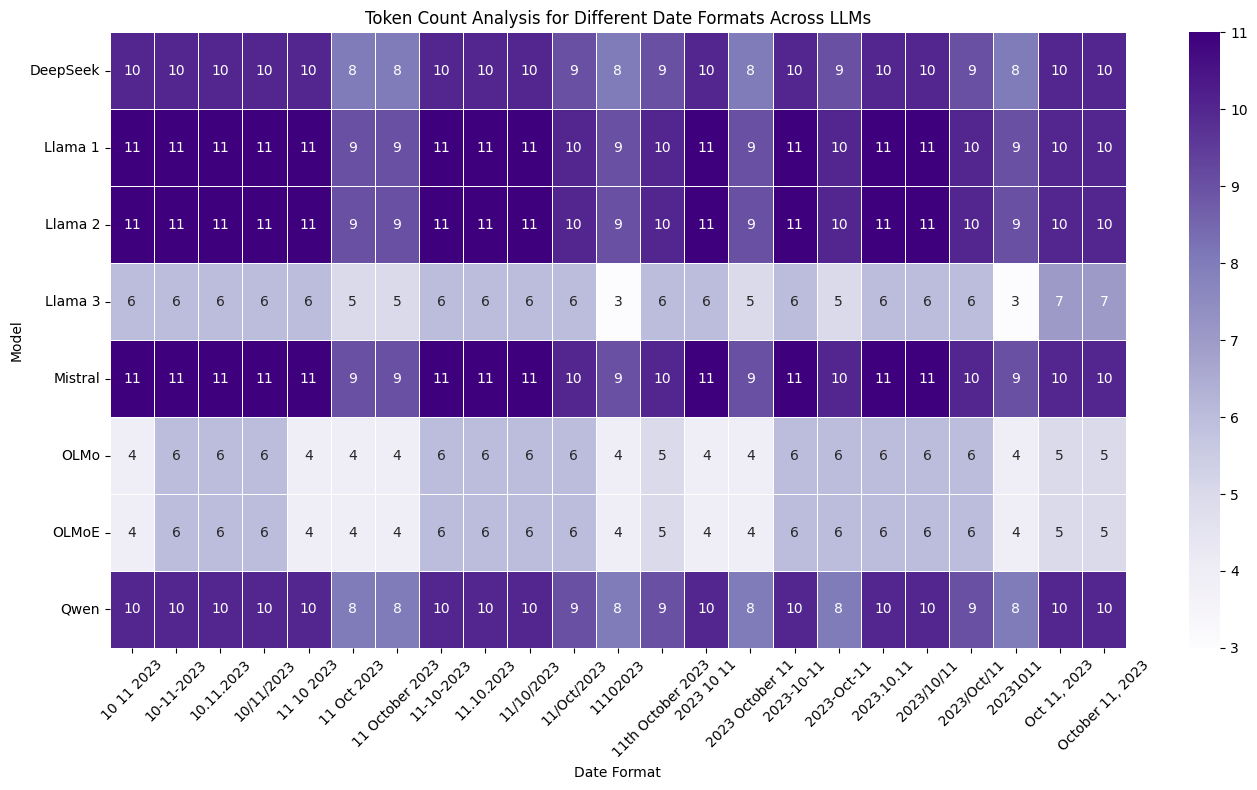


Tokenized Output for Semantic Interpretation Analysis:

Date Format: ('10 11 2023',)
   Model Date Format      Tokenized Output
 Llama 1  10 11 2023 ▁ 1 0 ▁ 1 1 ▁ 2 0 2 3
 Llama 2  10 11 2023 ▁ 1 0 ▁ 1 1 ▁ 2 0 2 3
 Llama 3  10 11 2023       10 Ġ 11 Ġ 202 3
   OLMoE  10 11 2023         10 Ġ11 Ġ20 23
    OLMo  10 11 2023         10 Ġ11 Ġ20 23
 Mistral  10 11 2023 ▁ 1 0 ▁ 1 1 ▁ 2 0 2 3
    Qwen  10 11 2023   1 0 Ġ 1 1 Ġ 2 0 2 3
DeepSeek  10 11 2023   1 0 Ġ 1 1 Ġ 2 0 2 3

Date Format: ('10-11-2023',)
   Model Date Format      Tokenized Output
 Llama 1  10-11-2023 ▁ 1 0 - 1 1 - 2 0 2 3
 Llama 2  10-11-2023 ▁ 1 0 - 1 1 - 2 0 2 3
 Llama 3  10-11-2023       10 - 11 - 202 3
   OLMoE  10-11-2023       10 - 11 - 20 23
    OLMo  10-11-2023       10 - 11 - 20 23
 Mistral  10-11-2023 ▁ 1 0 - 1 1 - 2 0 2 3
    Qwen  10-11-2023   1 0 - 1 1 - 2 0 2 3
DeepSeek  10-11-2023   1 0 - 1 1 - 2 0 2 3

Date Format: ('10.11.2023',)
   Model Date Format      Tokenized Output
 Llama 1  10.11.2023 ▁ 1 0 . 1 1 . 2 

In [ ]:
from transformers import AutoModelForCausalLM, AutoModel, AutoTokenizer
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def tokenize_dates(date_list, model_name='meta-llama/Llama-2-7b-hf',to_print_name="Llama 2"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens_list = []
    tokenized_outputs = []

    for date_str in date_list:
        tokens = tokenizer.encode(date_str, add_special_tokens=False)
        tokens_list.append(len(tokens))
        tokenized_outputs.append(tokenizer.convert_ids_to_tokens(tokens))

    final_results = {
        'Model': [to_print_name] * len(date_list),
        'Date Format': date_list,
        'Token Count': tokens_list,
        'Tokenized Output': [" ".join(tokens) for tokens in tokenized_outputs]
    }

    df = pd.DataFrame(final_results)
    return df

# Different date formats
date_formats = [
    '20231011',       # YYYYMMDD
    '2023-10-11',    # YYYY-MM-DD
    '2023/10/11',    # YYYY/MM/DD
    '2023.10.11',    # YYYY.MM.DD
    '2023 10 11',    # YYYY MM DD
    '11102023',       # DDMMYYYY
    '11-10-2023',    # DD-MM-YYYY
    '11/10/2023',    # DD/MM/YYYY
    '11.10.2023',    # DD.MM.YYYY
    '11 10 2023',    # DD MM YYYY
    '10/11/2023',    # MM/DD/YYYY
    '10-11-2023',    # MM-DD-YYYY
    '10.11.2023',    # MM.DD.YYYY
    '10 11 2023',    # MM DD YYYY
    'October 11, 2023',
    '11th October 2023',
    '11 October 2023',
    'Oct 11, 2023',
    '11 Oct 2023',
    '2023-Oct-11',
    '2023/Oct/11',
    '11/Oct/2023',
    '2023 October 11'
]

def gen_graphs(model_dict, date_formats):
    df = []
    for model_name, to_print_name in model_dict.items():
        tokenization_results = tokenize_dates(date_formats, model_name=model_name, to_print_name=to_print_name)
        df.append(tokenization_results)

    data = pd.concat(df, ignore_index=True)
    df = data.drop('Tokenized Output', axis=1)

    df = df.groupby(['Date Format', 'Model'], as_index=False).mean()

    # Visualize token count as a heatmap
    pivot_df = df.pivot(index='Model', columns='Date Format', values='Token Count')

    plt.figure(figsize=(14, 8))
    sns.heatmap(pivot_df, annot=True, cmap='Purples', linewidths=0.5)
    plt.title('Token Count Analysis for Different Date Formats Across LLMs')
    plt.xlabel('Date Format')
    plt.ylabel('Model')
    plt.yticks(rotation=0)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Display tokenized output for semantic interpretation analysis
    display_df = data[['Model', 'Date Format', 'Tokenized Output']]
    grouped_display_df = display_df.groupby(['Date Format'], as_index=False)
    print("\nTokenized Output for Semantic Interpretation Analysis:")
    for new_df in grouped_display_df:
        print(f"\nDate Format: {new_df[0]}")
        print(new_df[1].to_string(index=False))

model_list = {
    'relaxml/Llama-1-7b-hf': 'Llama 1',
    'meta-llama/Llama-2-7b-hf': 'Llama 2',
    'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
    'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
    'allenai/OLMo-1B-0724-hf': 'OLMo',
    'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
    'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
    'deepseek-ai/DeepSeek-V2.5': 'DeepSeek'
}

gen_graphs(model_list, date_formats)


<ipython-input-32-d9edb7ea6635>:58: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-d9edb7ea6635>:74: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
<ipython-input-32-d9edb7ea6635>:81: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')


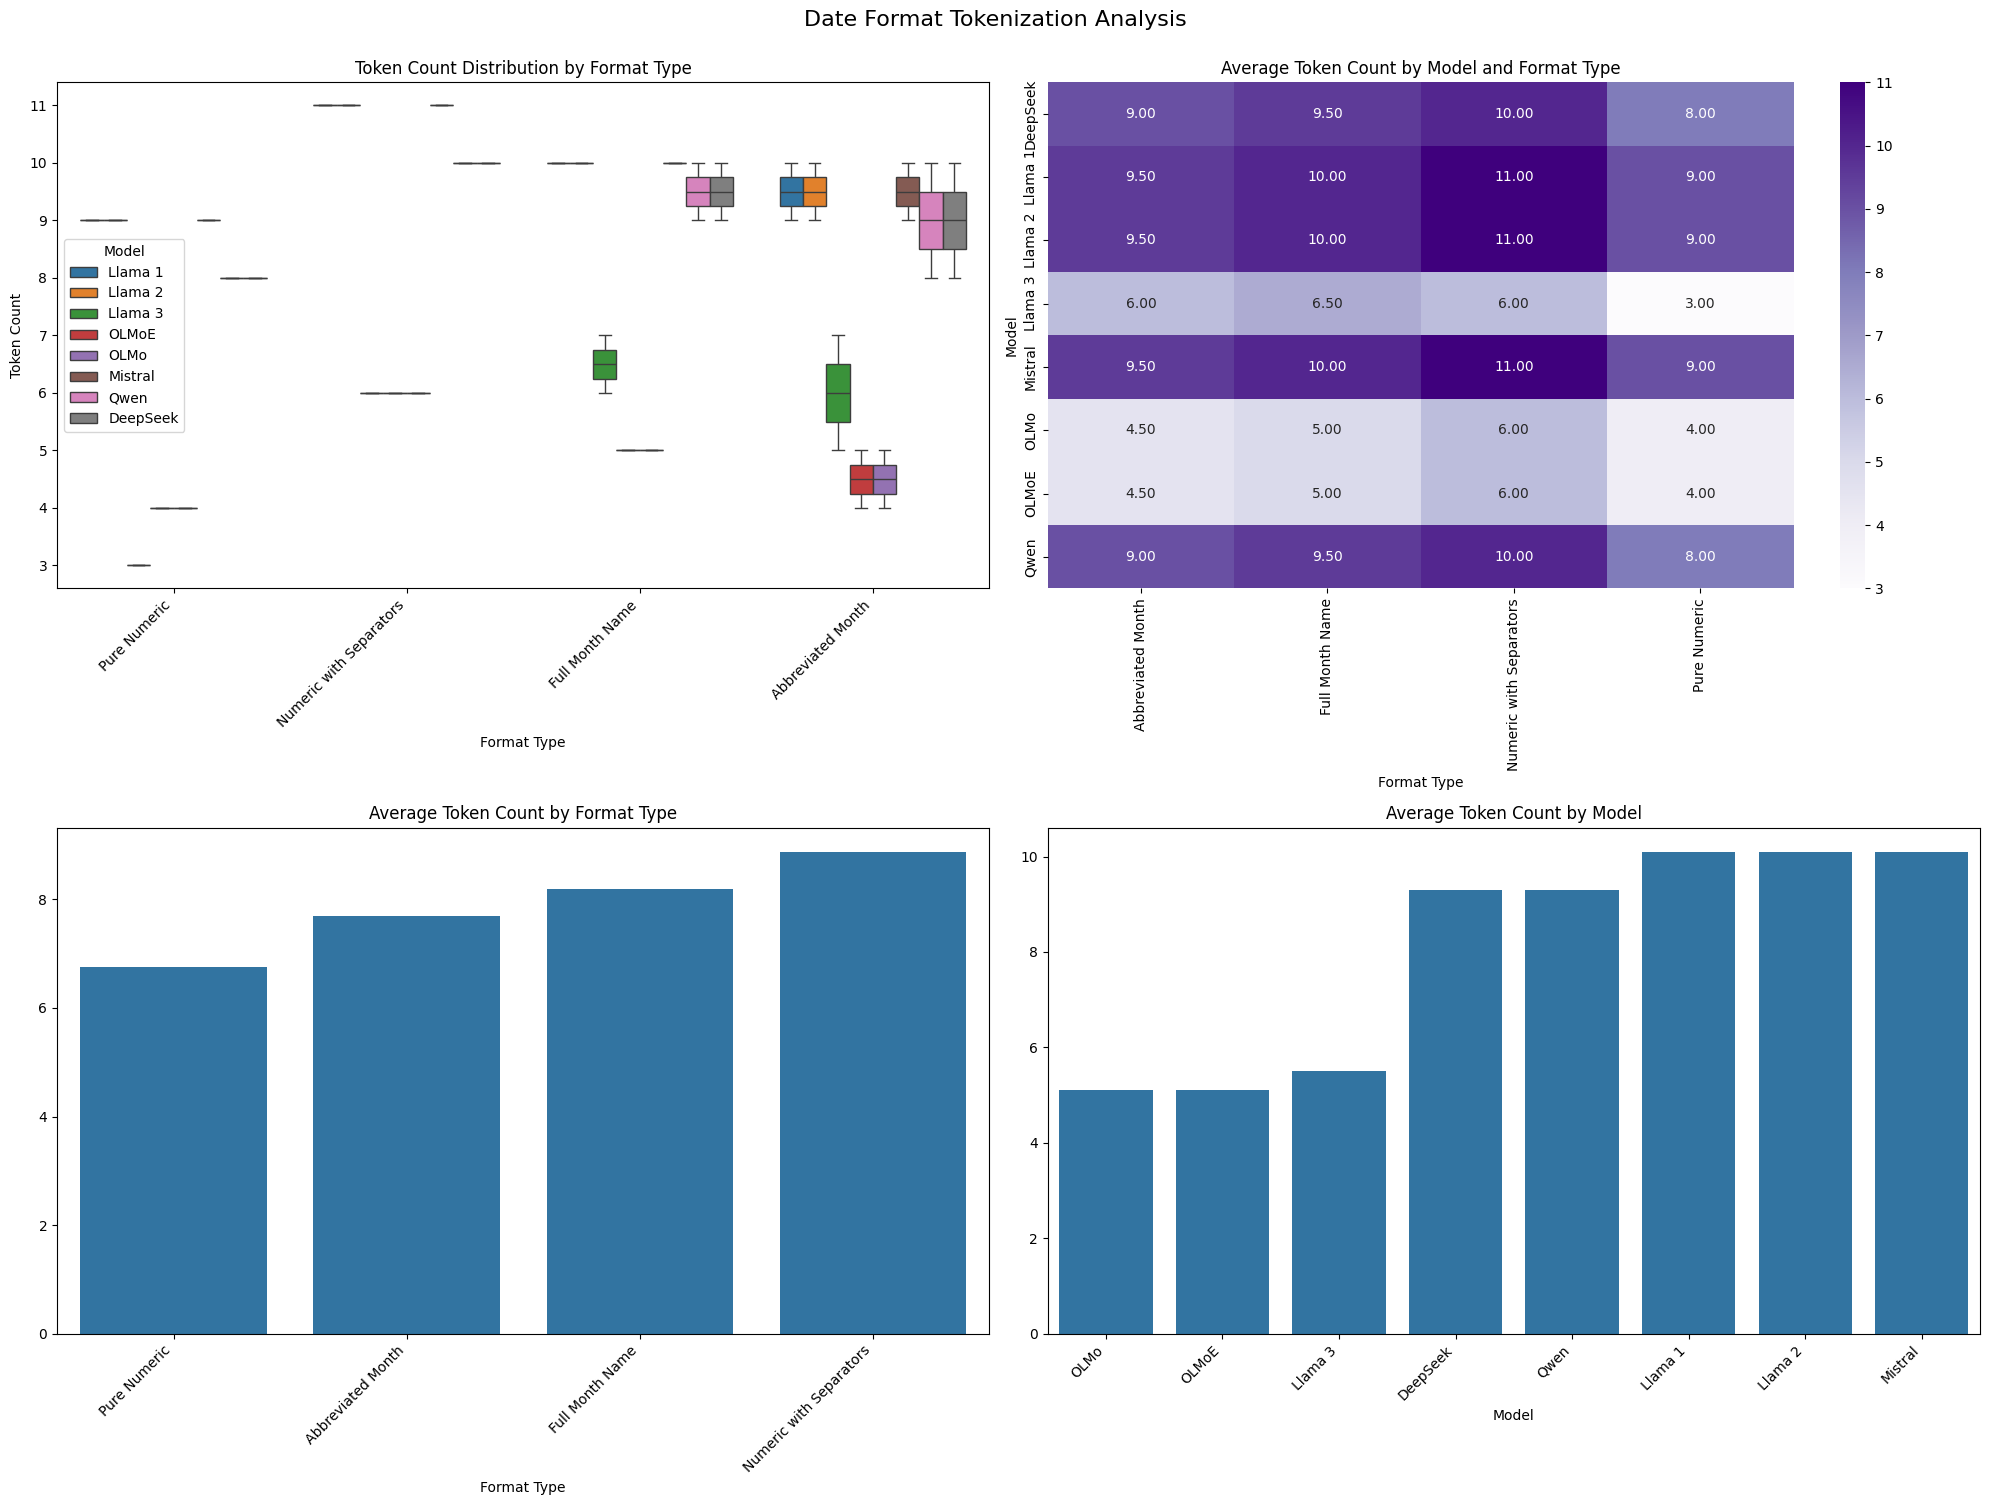


    Tokenization Analysis Report:
    
    1. Format Efficiency:
       - Most efficient format type: Pure Numeric (avg 6.75 tokens)
       - Least efficient format type: Numeric with Separators (avg 8.88 tokens)
    
    2. Model Efficiency:
       - Most efficient model: OLMo (avg 5.10 tokens)
       - Least efficient model: Llama 1 (avg 10.10 tokens)
    
    3. Format Type Statistics:
    
       Abbreviated Month:
       - Average tokens: 7.69
       - Standard deviation: 2.33
       - Range: 4-10 tokens
    
       Full Month Name:
       - Average tokens: 8.19
       - Standard deviation: 2.23
       - Range: 5-10 tokens
    
       Numeric with Separators:
       - Average tokens: 8.88
       - Standard deviation: 2.30
       - Range: 6-11 tokens
    
       Pure Numeric:
       - Average tokens: 6.75
       - Standard deviation: 2.52
       - Range: 3-9 tokens
    


In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def tokenize_dates(date_list, model_name='meta-llama/Llama-2-7b-hf', to_print_name="Llama 2"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens_list = []
    tokenized_outputs = []
    token_counts = []

    for date_str in date_list:
        tokens = tokenizer.encode(date_str, add_special_tokens=False)
        tokens_list.append(len(tokens))
        tokenized_output = tokenizer.convert_ids_to_tokens(tokens)
        tokenized_outputs.append(tokenized_output)
        token_counts.append(len(tokenized_output))

    final_results = {
        'Model': [to_print_name] * len(date_list),
        'Date Format': date_list,
        'Token Count': tokens_list,
        'Tokenized Output': [" ".join(tokens) for tokens in tokenized_outputs],
        'Format Type': [categorize_date_format(date) for date in date_list]
    }

    return pd.DataFrame(final_results)

def categorize_date_format(date_str):
    if date_str.replace('.', '').replace('/', '').replace('-', '').replace(' ', '').isdigit():
        if any(x in date_str for x in ['/', '-', '.', ' ']):
            return 'Numeric with Separators'
        return 'Pure Numeric'
    elif any(month in date_str.lower() for month in ['january', 'february', 'march', 'april', 'may', 'june', 'july',
                                                    'august', 'september', 'october', 'november', 'december']):
        return 'Full Month Name'
    elif any(month in date_str.lower() for month in ['jan', 'feb', 'mar', 'apr', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']):
        return 'Abbreviated Month'
    return 'Other'

def analyze_tokenization(data):
    """Analyzes tokenization patterns and returns insights"""
    format_type_stats = data.groupby(['Format Type', 'Model'])['Token Count'].agg(['mean', 'std']).round(2)
    format_type_stats = format_type_stats.reset_index()
    return format_type_stats

def plot_tokenization_analysis(data, model_dict):
    """Creates multiple visualizations for tokenization analysis"""
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 15))
    fig.suptitle('Date Format Tokenization Analysis', fontsize=16, y=1)

    # 1. Token Count Distribution by Format Type
    ax1 = plt.subplot(221)
    sns.boxplot(data=data, x='Format Type', y='Token Count', hue='Model', ax=ax1)
    ax1.set_title('Token Count Distribution by Format Type')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # 2. Average Token Count Heatmap
    ax2 = plt.subplot(222)
    pivot_data = data.pivot_table(values='Token Count',
                                 index='Model',
                                 columns='Format Type',
                                 aggfunc='mean')
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='Purples', ax=ax2)
    ax2.set_title('Average Token Count by Model and Format Type')

    # 3. Token Count Trends
    ax3 = plt.subplot(223)
    format_means = data.groupby('Format Type')['Token Count'].mean().sort_values()
    sns.barplot(x=format_means.index, y=format_means.values, ax=ax3)
    ax3.set_title('Average Token Count by Format Type')
    ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')

    # 4. Model Comparison
    ax4 = plt.subplot(224)
    model_means = data.groupby('Model')['Token Count'].mean().sort_values()
    sns.barplot(x=model_means.index, y=model_means.values, ax=ax4)
    ax4.set_title('Average Token Count by Model')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    return fig

def generate_analysis_report(data):
    """Generates a text report of key findings"""
    format_stats = data.groupby('Format Type')['Token Count'].agg(['mean', 'std', 'min', 'max'])
    model_stats = data.groupby('Model')['Token Count'].mean()

    # Calculate most and least efficient formats and models
    most_efficient_format = format_stats['mean'].idxmin()
    least_efficient_format = format_stats['mean'].idxmax()
    most_efficient_model = model_stats.idxmin()
    least_efficient_model = model_stats.idxmax()

    report = f"""
    Tokenization Analysis Report:

    1. Format Efficiency:
       - Most efficient format type: {most_efficient_format} (avg {format_stats.loc[most_efficient_format, 'mean']:.2f} tokens)
       - Least efficient format type: {least_efficient_format} (avg {format_stats.loc[least_efficient_format, 'mean']:.2f} tokens)

    2. Model Efficiency:
       - Most efficient model: {most_efficient_model} (avg {model_stats[most_efficient_model]:.2f} tokens)
       - Least efficient model: {least_efficient_model} (avg {model_stats[least_efficient_model]:.2f} tokens)

    3. Format Type Statistics:
    """

    for format_type in format_stats.index:
        report += f"""
       {format_type}:
       - Average tokens: {format_stats.loc[format_type, 'mean']:.2f}
       - Standard deviation: {format_stats.loc[format_type, 'std']:.2f}
       - Range: {format_stats.loc[format_type, 'min']:.0f}-{format_stats.loc[format_type, 'max']:.0f} tokens
    """

    return report

def main():
    # Define date formats with categories
    date_formats = [
        '20231011',       # Pure Numeric
        '2023-10-11',     # Numeric with Separators
        '2023/10/11',     # Numeric with Separators
        '2023.10.11',     # Numeric with Separators
        '11102023',       # Pure Numeric
        '11-10-2023',     # Numeric with Separators
        'October 11, 2023', # Full Month Name
        '11th October 2023', # Full Month Name
        'Oct 11, 2023',   # Abbreviated Month
        '11 Oct 2023',    # Abbreviated Month
    ]

    # Define models to compare
    model_list = {
    'relaxml/Llama-1-7b-hf': 'Llama 1',
    'meta-llama/Llama-2-7b-hf': 'Llama 2',
    'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
    'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
    'allenai/OLMo-1B-0724-hf': 'OLMo',
    'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
    'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
    'deepseek-ai/DeepSeek-V2.5': 'DeepSeek'
    }

    # Collect data
    all_data = []
    for model_name, print_name in model_list.items():
        df = tokenize_dates(date_formats, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations
    fig = plot_tokenization_analysis(combined_data, model_list)
    plt.show()

    # Generate and print analysis report
    report = generate_analysis_report(combined_data)
    print(report)

    # Save results if needed
    combined_data.to_csv('tokenization_analysis.csv', index=False)
    fig.savefig('tokenization_analysis.png', dpi=300, bbox_inches='tight')

if __name__ == "__main__":
    main()

<ipython-input-35-1787a0325866>:90: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-35-1787a0325866>:96: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
<ipython-input-35-1787a0325866>:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
<ipython-input-35-1787a0325866>:118: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, ha='right')
<ipython-input-35-1787a0325866>:124: UserWarning: set_ticklabe

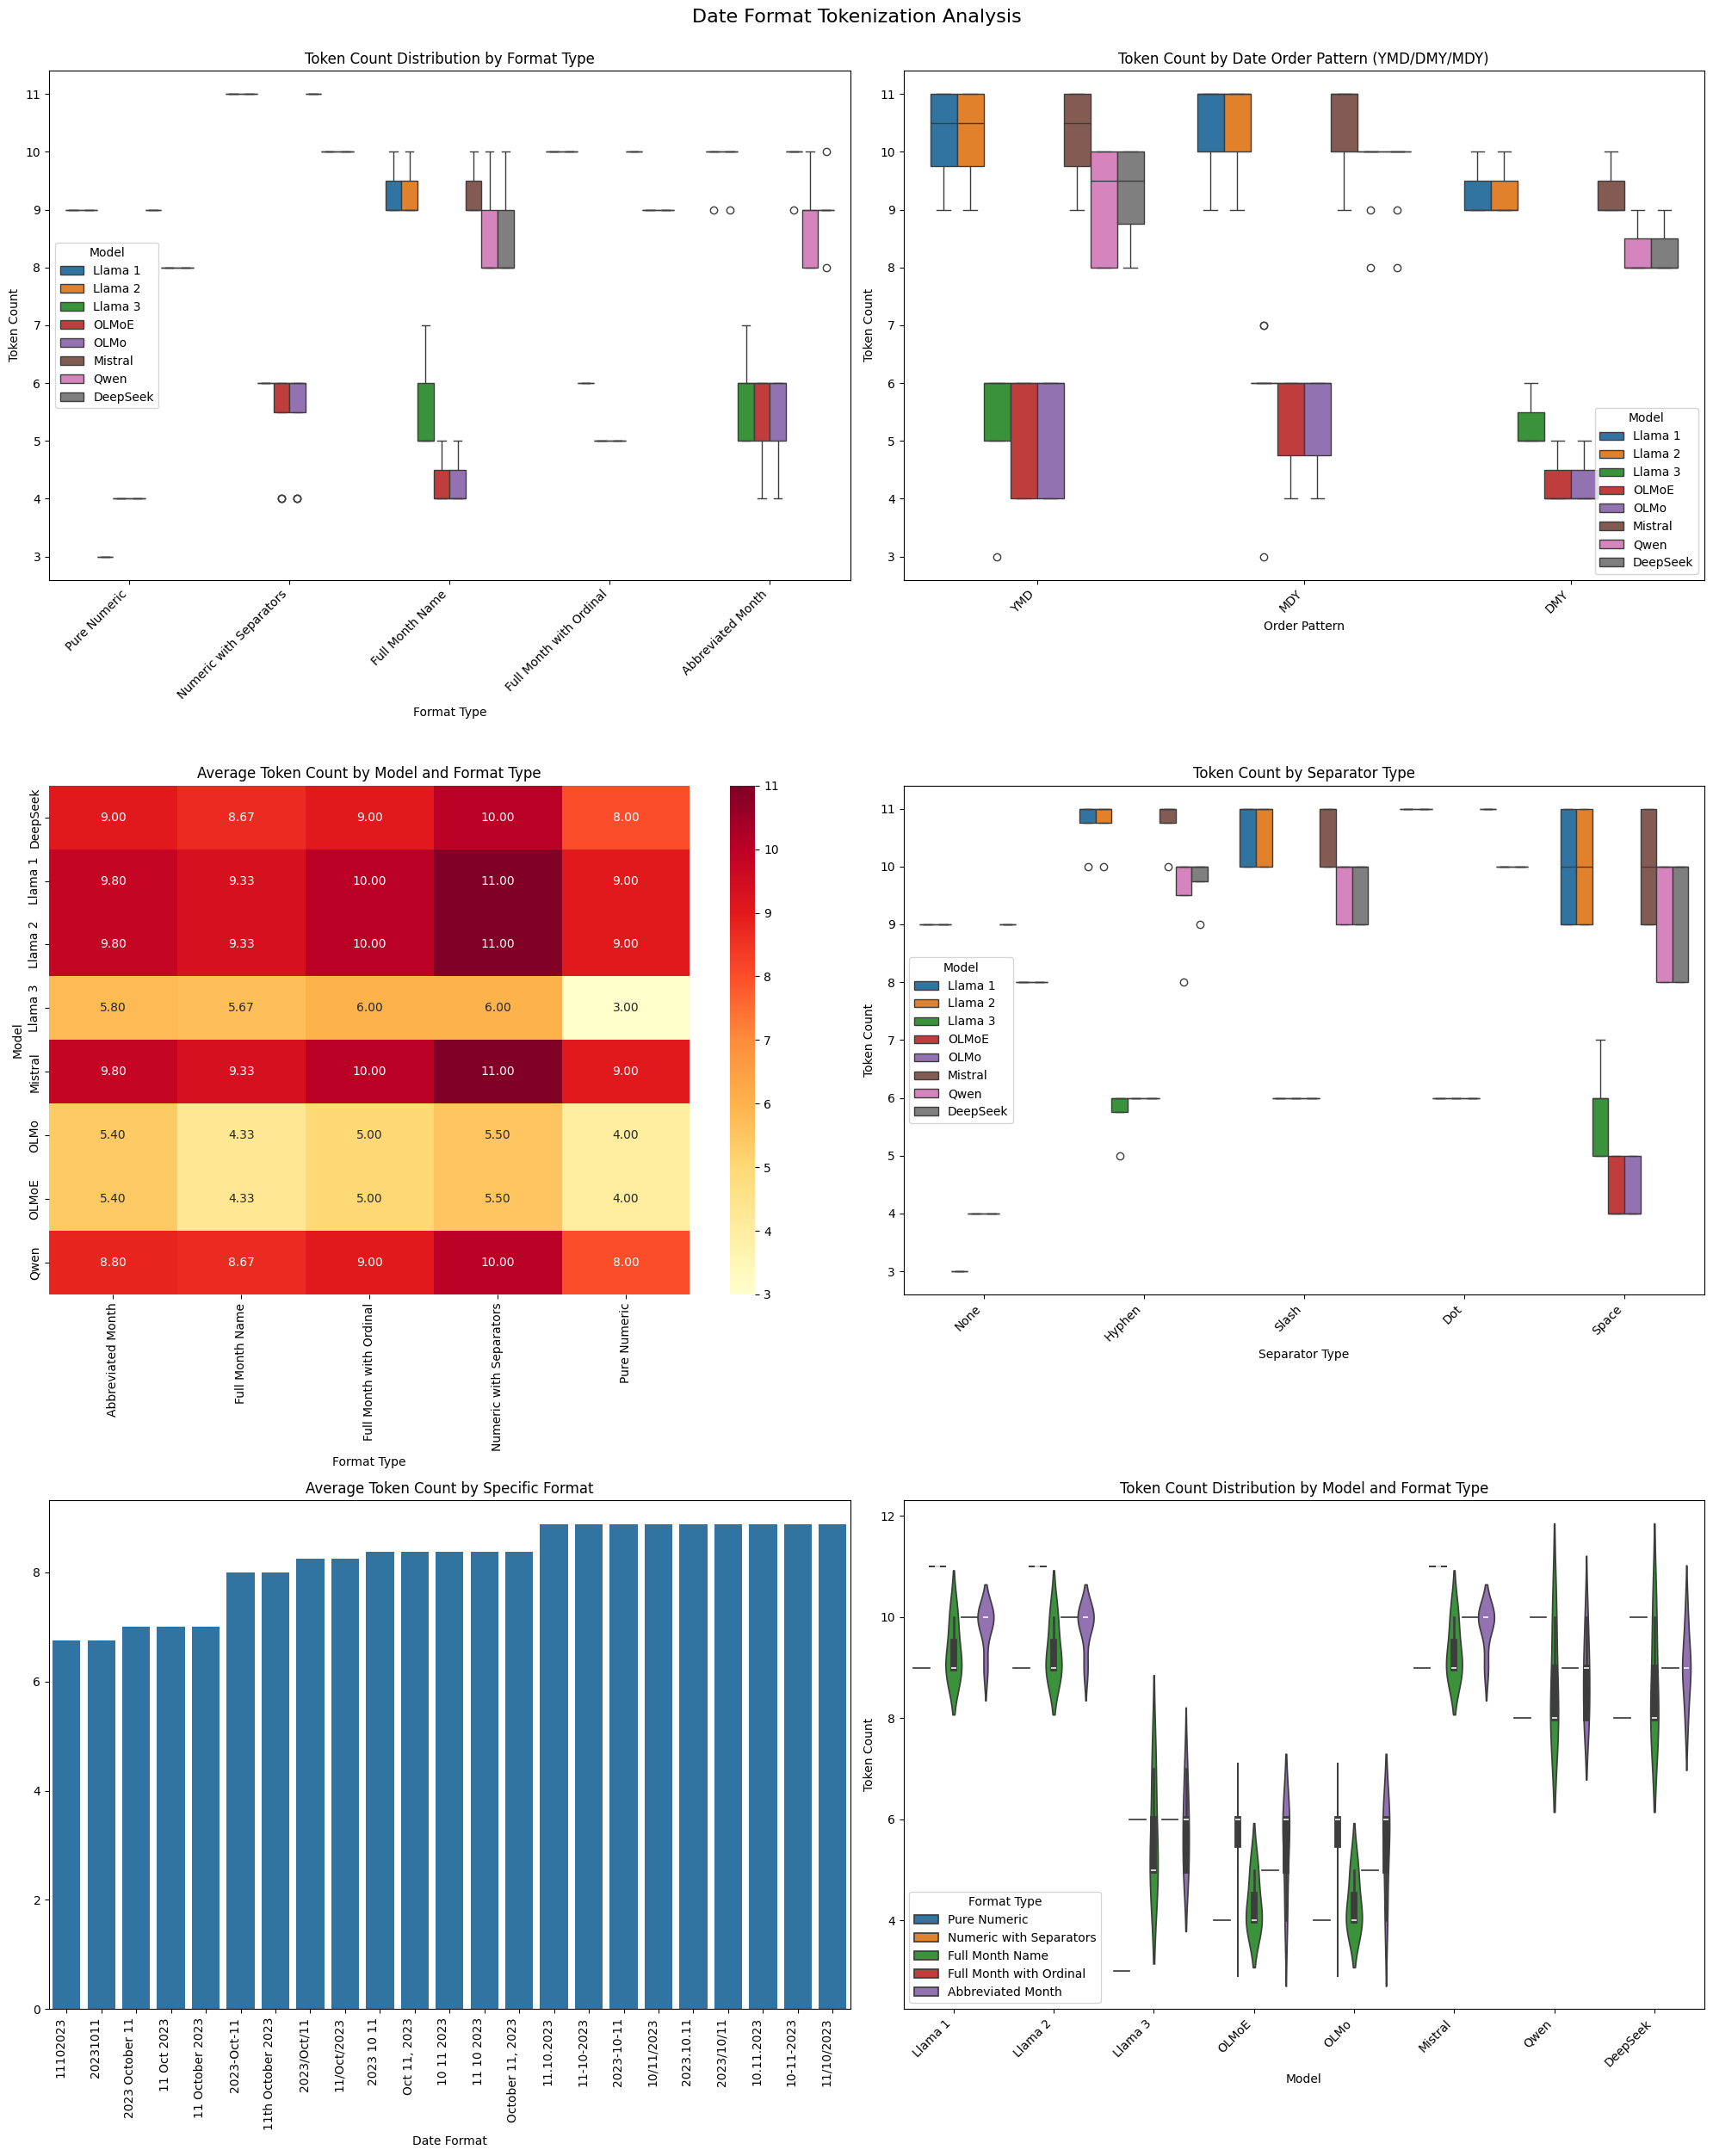


    Tokenization Analysis Report:
    
    1. Format Type Analysis:
    
       Abbreviated Month (DMY):
       - Average tokens: 7.00
       - Standard deviation: 2.27
       - Range: 4-9 tokens
    
       Abbreviated Month (MDY):
       - Average tokens: 8.31
       - Standard deviation: 2.06
       - Range: 5-10 tokens
    
       Abbreviated Month (YMD):
       - Average tokens: 8.12
       - Standard deviation: 1.93
       - Range: 5-10 tokens
    
       Full Month Name (DMY):
       - Average tokens: 7.00
       - Standard deviation: 2.27
       - Range: 4-9 tokens
    
       Full Month Name (MDY):
       - Average tokens: 8.38
       - Standard deviation: 2.33
       - Range: 5-10 tokens
    
       Full Month Name (YMD):
       - Average tokens: 7.00
       - Standard deviation: 2.27
       - Range: 4-9 tokens
    
       Full Month with Ordinal (DMY):
       - Average tokens: 8.00
       - Standard deviation: 2.27
       - Range: 5-10 tokens
    
       Numeric with Separa

In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def tokenize_dates(date_list, model_name='meta-llama/Llama-2-7b-hf', to_print_name="Llama 2"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    tokens_list = []
    tokenized_outputs = []
    token_counts = []

    for date_str in date_list:
        tokens = tokenizer.encode(date_str, add_special_tokens=False)
        tokens_list.append(len(tokens))
        tokenized_output = tokenizer.convert_ids_to_tokens(tokens)
        tokenized_outputs.append(tokenized_output)
        token_counts.append(len(tokenized_output))

    final_results = {
        'Model': [to_print_name] * len(date_list),
        'Date Format': date_list,
        'Token Count': tokens_list,
        'Tokenized Output': [" ".join(tokens) for tokens in tokenized_outputs],
        'Format Type': [categorize_date_format(date) for date in date_list],
        'Order Pattern': [determine_date_order(date) for date in date_list],
        'Separator Type': [determine_separator(date) for date in date_list]
    }

    return pd.DataFrame(final_results)

def determine_date_order(date_str):
    """Determine if the date follows YMD, DMY, or MDY pattern"""
    if any(month in date_str for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                         'August', 'September', 'October', 'November', 'December',
                                         'Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
        if date_str.startswith('2023'):
            return 'YMD'
        elif date_str.split()[0].replace('th', '').replace('st', '').replace('nd', '').replace('rd', '').isdigit():
            return 'DMY'
        else:
            return 'MDY'
    else:
        # For numeric formats
        if date_str.startswith('2023'):
            return 'YMD'
        elif date_str[0:2].isdigit() and int(date_str[0:2]) <= 12:
            return 'MDY'
        else:
            return 'DMY'

def determine_separator(date_str):
    """Identify the separator used in the date format"""
    if '-' in date_str:
        return 'Hyphen'
    elif '/' in date_str:
        return 'Slash'
    elif '.' in date_str:
        return 'Dot'
    elif ' ' in date_str:
        return 'Space'
    else:
        return 'None'

def categorize_date_format(date_str):
    """Categorize date format based on its characteristics"""
    if date_str.replace('.', '').replace('/', '').replace('-', '').replace(' ', '').isdigit():
        if any(x in date_str for x in ['/', '-', '.', ' ']):
            return 'Numeric with Separators'
        return 'Pure Numeric'
    elif any(month in date_str for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                           'August', 'September', 'October', 'November', 'December']):
        if any(ord_indicator in date_str for ord_indicator in ['st', 'nd', 'rd', 'th']):
            return 'Full Month with Ordinal'
        return 'Full Month Name'
    elif any(month in date_str for month in ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
        return 'Abbreviated Month'
    return 'Other'

def plot_tokenization_analysis(data):
    """Creates multiple visualizations for tokenization analysis"""
    # Create a figure with multiple subplots
    fig = plt.figure(figsize=(20, 25))
    fig.suptitle('Date Format Tokenization Analysis', fontsize=16, y=1)

    # 1. Token Count Distribution by Format Type
    ax1 = plt.subplot(321)
    sns.boxplot(data=data, x='Format Type', y='Token Count', hue='Model', ax=ax1)
    ax1.set_title('Token Count Distribution by Format Type')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # 2. Token Count by Date Order Pattern
    ax2 = plt.subplot(322)
    sns.boxplot(data=data, x='Order Pattern', y='Token Count', hue='Model', ax=ax2)
    ax2.set_title('Token Count by Date Order Pattern (YMD/DMY/MDY)')
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')

    # 3. Average Token Count Heatmap
    ax3 = plt.subplot(323)
    pivot_data = data.pivot_table(values='Token Count',
                                 index='Model',
                                 columns='Format Type',
                                 aggfunc='mean')
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax3)
    ax3.set_title('Average Token Count by Model and Format Type')

    # 4. Separator Analysis
    ax4 = plt.subplot(324)
    sns.boxplot(data=data, x='Separator Type', y='Token Count', hue='Model', ax=ax4)
    ax4.set_title('Token Count by Separator Type')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

    # 5. Format Efficiency Bar Plot
    ax5 = plt.subplot(325)
    format_means = data.groupby('Date Format')['Token Count'].mean().sort_values()
    sns.barplot(x=format_means.index, y=format_means.values, ax=ax5)
    ax5.set_title('Average Token Count by Specific Format')
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=90, ha='right')

    # 6. Model Comparison across Format Types
    ax6 = plt.subplot(326)
    sns.violinplot(data=data, x='Model', y='Token Count', hue='Format Type', ax=ax6)
    ax6.set_title('Token Count Distribution by Model and Format Type')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    return fig

def generate_analysis_report(data):
    """Generates a comprehensive analysis report"""
    format_stats = data.groupby(['Format Type', 'Order Pattern'])['Token Count'].agg(['mean', 'std', 'min', 'max'])
    model_stats = data.groupby(['Model', 'Format Type'])['Token Count'].mean().unstack()
    separator_stats = data.groupby('Separator Type')['Token Count'].agg(['mean', 'std'])

    report = """
    Tokenization Analysis Report:

    1. Format Type Analysis:
    """

    for (format_type, order_pattern), stats in format_stats.iterrows():
        report += f"""
       {format_type} ({order_pattern}):
       - Average tokens: {stats['mean']:.2f}
       - Standard deviation: {stats['std']:.2f}
       - Range: {stats['min']:.0f}-{stats['max']:.0f} tokens
    """

    report += "\n    2. Separator Impact:\n"
    for separator, stats in separator_stats.iterrows():
        report += f"""
       {separator}:
       - Average tokens: {stats['mean']:.2f}
       - Standard deviation: {stats['std']:.2f}
    """

    report += "\n    3. Model Performance:\n"
    for model in model_stats.index:
        report += f"""
       {model}:
       - Best performing format: {model_stats.loc[model].idxmin()} ({model_stats.loc[model].min():.2f} tokens)
       - Worst performing format: {model_stats.loc[model].idxmax()} ({model_stats.loc[model].max():.2f} tokens)
    """

    return report

def main():
    date_formats = [
        '20231011',       # YYYYMMDD
        '2023-10-11',    # YYYY-MM-DD
        '2023/10/11',    # YYYY/MM/DD
        '2023.10.11',    # YYYY.MM.DD
        '2023 10 11',    # YYYY MM DD
        '11102023',       # DDMMYYYY
        '11-10-2023',    # DD-MM-YYYY
        '11/10/2023',    # DD/MM/YYYY
        '11.10.2023',    # DD.MM.YYYY
        '11 10 2023',    # DD MM YYYY
        '10/11/2023',    # MM/DD/YYYY
        '10-11-2023',    # MM-DD-YYYY
        '10.11.2023',    # MM.DD.YYYY
        '10 11 2023',    # MM DD YYYY
        'October 11, 2023',
        '11th October 2023',
        '11 October 2023',
        'Oct 11, 2023',
        '11 Oct 2023',
        '2023-Oct-11',
        '2023/Oct/11',
        '11/Oct/2023',
        '2023 October 11'
    ]

    model_list = {
    'relaxml/Llama-1-7b-hf': 'Llama 1',
    'meta-llama/Llama-2-7b-hf': 'Llama 2',
    'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
    'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
    'allenai/OLMo-1B-0724-hf': 'OLMo',
    'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
    'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
    'deepseek-ai/DeepSeek-V2.5': 'DeepSeek'
    }

    # Collect data
    all_data = []
    for model_name, print_name in model_list.items():
        df = tokenize_dates(date_formats, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations
    fig = plot_tokenization_analysis(combined_data)
    plt.show()

    # Generate and print analysis report
    report = generate_analysis_report(combined_data)
    print(report)

    # Save results
    combined_data.to_csv('tokenization_analysis_expanded.csv', index=False)
    fig.savefig('tokenization_analysis_expanded.png', dpi=300, bbox_inches='tight')

if __name__ == "__main__":
    main()

<ipython-input-38-00fef35c6ad3>:97: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')
<ipython-input-38-00fef35c6ad3>:117: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
<ipython-input-38-00fef35c6ad3>:123: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
<ipython-input-38-00fef35c6ad3>:129: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')


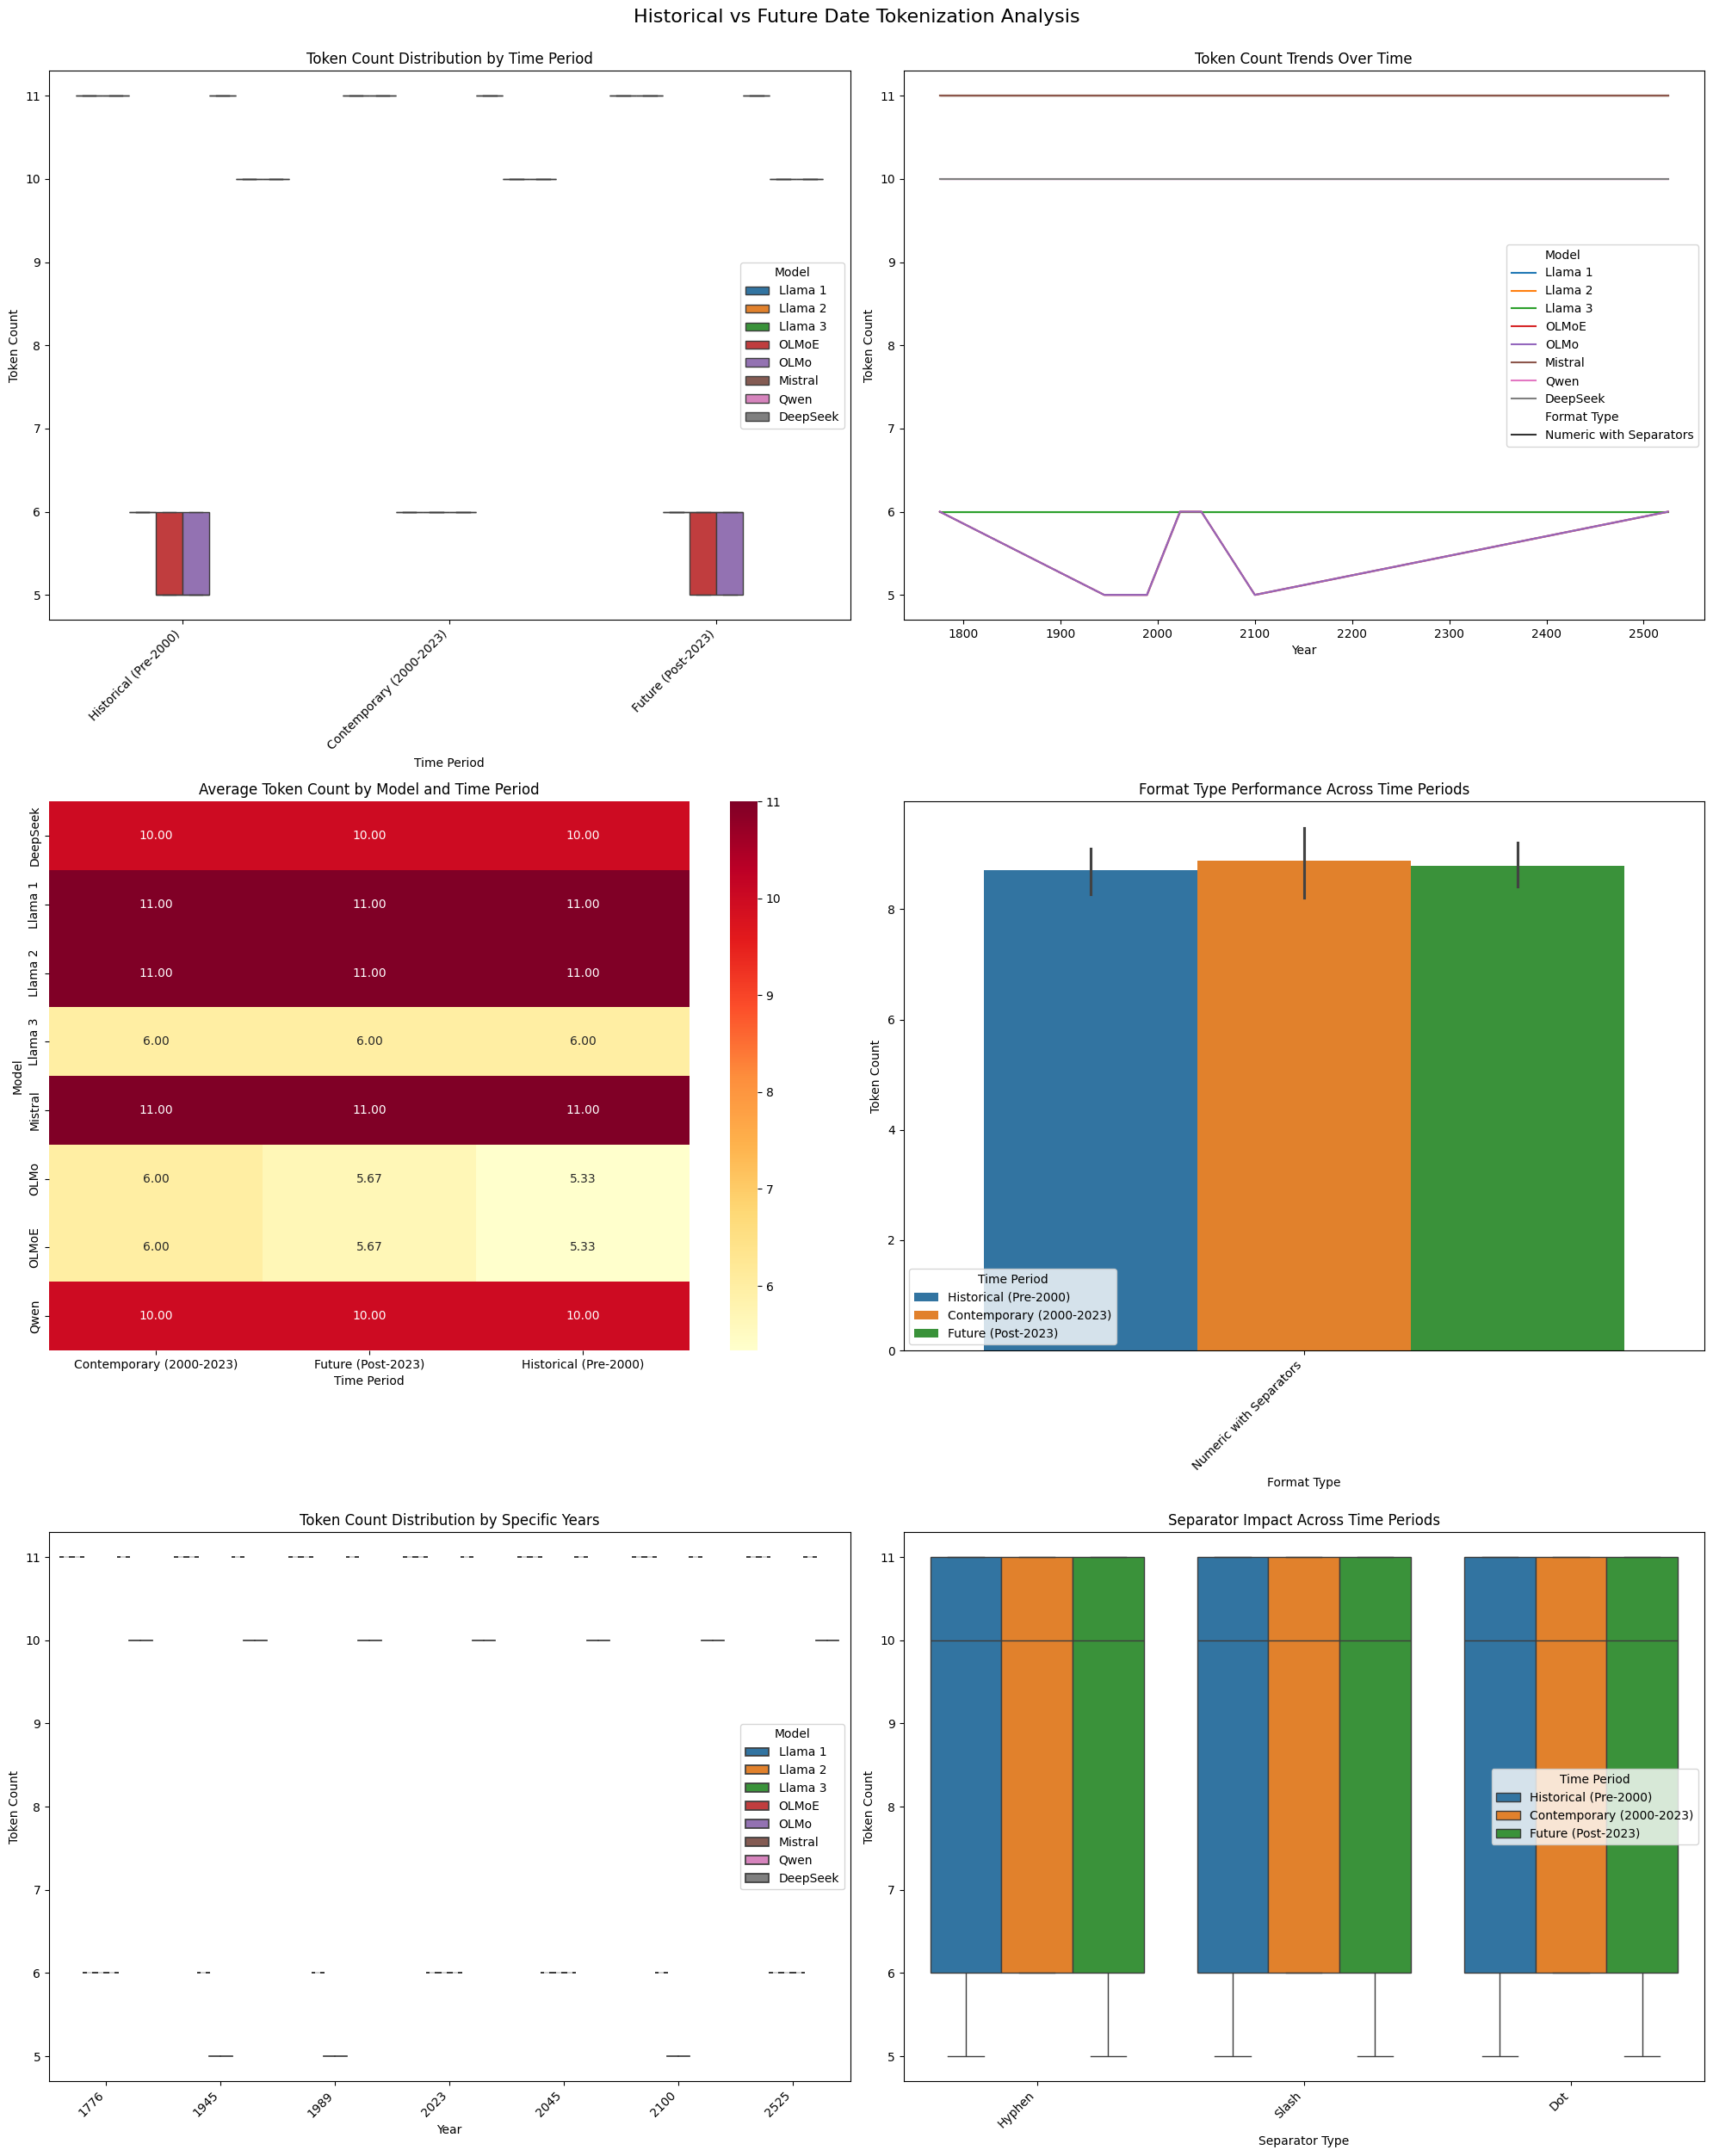


    Temporal Tokenization Analysis Report:
    
    1. Time Period Comparison:
    
       Contemporary (2000-2023) - DeepSeek:
       - Average tokens: 10.00
       - Standard deviation: 0.00
       - Range: 10-10 tokens
    
       Contemporary (2000-2023) - Llama 1:
       - Average tokens: 11.00
       - Standard deviation: 0.00
       - Range: 11-11 tokens
    
       Contemporary (2000-2023) - Llama 2:
       - Average tokens: 11.00
       - Standard deviation: 0.00
       - Range: 11-11 tokens
    
       Contemporary (2000-2023) - Llama 3:
       - Average tokens: 6.00
       - Standard deviation: 0.00
       - Range: 6-6 tokens
    
       Contemporary (2000-2023) - Mistral:
       - Average tokens: 11.00
       - Standard deviation: 0.00
       - Range: 11-11 tokens
    
       Contemporary (2000-2023) - OLMo:
       - Average tokens: 6.00
       - Standard deviation: 0.00
       - Range: 6-6 tokens
    
       Contemporary (2000-2023) - OLMoE:
       - Average tokens: 6.00


In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import tiktoken

def generate_date_variations(formats):
    """Generate historical and future dates in different formats"""
    date_formats = []
    years = [
        1776,  # American Independence
        1945,  # End of WWII
        1989,  # Fall of Berlin Wall
        2024,  # Present
        2045,  # Near future
        2100,  # Century milestone
        2525,  # Far future
    ]
    months = list(range(1, 13))
    days = list(range(1, 29))

    for year in years:
        for month in months:
            for day in days:
              for fmt in formats:
                  if 'YYYY' in fmt:
                      year_str = str(year)
                      if len(year_str) < 4:
                          year_str = '0' * (4 - len(year_str)) + year_str
                  if 'MM' in fmt:
                      month_str = str(month)
                      if len(month_str) < 2:
                          month_str = '0' * (2 - len(month_str)) + month_str
                  if 'DD' in fmt:
                      day_str = str(day)
                      if len(day_str) < 2:
                          day_str = '0' * (2 - len(day_str)) + day_str

    return date_formats

def tokenize_dates(date_variations, model_name='meta-llama/Llama-2-7b-hf', to_print_name="Llama 2"):
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    results = []

    for date_str, year in date_variations:
        tokens = tokenizer.encode(date_str, add_special_tokens=False)
        tokenized_output = tokenizer.convert_ids_to_tokens(tokens)

        # Determine time period category
        if year < 2000:
            period = "Historical (Pre-2000)"
        elif 2000 <= year <= 2024:
            period = "Contemporary (2000-2024)"
        else:
            period = "Future (Post-2024)"

        # Determine century
        century = f"{(year // 100) + 1}th Century"

        results.append({
            'Model': to_print_name,
            'Date Format': date_str,
            'Year': year,
            'Time Period': period,
            'Century': century,
            'Token Count': len(tokens),
            'Tokenized Output': " ".join(tokenized_output),
            'Format Type': categorize_date_format(date_str),
            'Separator Type': determine_separator(date_str)
        })

    return pd.DataFrame(results)


def categorize_date_format(date_str):
    """Categorize date format based on its characteristics"""
    if date_str.replace('.', '').replace('/', '').replace('-', '').replace(' ', '').isdigit():
        if any(x in date_str for x in ['/', '-', '.', ' ']):
            return 'Numeric with Separators'
        return 'Pure Numeric'
    elif any(month in date_str for month in ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                           'August', 'September', 'October', 'November', 'December']):
        return 'Full Month Name'
    elif any(month in date_str for month in ['Jan', 'Feb', 'Mar', 'Apr', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']):
        return 'Abbreviated Month'
    return 'Other'

def determine_separator(date_str):
    """Identify the separator used in the date format"""
    if '-' in date_str:
        return 'Hyphen'
    elif '/' in date_str:
        return 'Slash'
    elif '.' in date_str:
        return 'Dot'
    elif ' ' in date_str:
        return 'Space'
    return 'None'

def plot_temporal_analysis(data):
    """Creates visualizations for temporal analysis"""
    fig = plt.figure(figsize=(20, 25))
    fig.suptitle('Historical vs Future Date Tokenization Analysis', fontsize=16, y=1)

    # 1. Token Count Distribution by Time Period
    ax1 = plt.subplot(321)
    sns.boxplot(data=data, x='Time Period', y='Token Count', hue='Model', ax=ax1)
    ax1.set_title('Token Count Distribution by Time Period')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # 2. Token Count Trends Over Centuries
    ax2 = plt.subplot(322)
    sns.lineplot(data=data, x='Year', y='Token Count', hue='Model', style='Format Type', ax=ax2)
    ax2.set_title('Token Count Trends Over Time')

    # 3. Heatmap of Average Token Counts
    ax3 = plt.subplot(323)
    pivot_data = data.pivot_table(values='Token Count',
                                 index='Model',
                                 columns='Time Period',
                                 aggfunc='mean')
    sns.heatmap(pivot_data, annot=True, fmt='.2f', cmap='YlOrRd', ax=ax3)
    ax3.set_title('Average Token Count by Model and Time Period')

    # 4. Format Type Performance Across Time Periods
    ax4 = plt.subplot(324)
    sns.barplot(data=data, x='Format Type', y='Token Count', hue='Time Period', ax=ax4)
    ax4.set_title('Format Type Performance Across Time Periods')
    ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')

    # 5. Year-specific Analysis
    ax5 = plt.subplot(325)
    sns.violinplot(data=data, x='Year', y='Token Count', hue='Model', ax=ax5)
    ax5.set_title('Token Count Distribution by Specific Years')
    ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')

    # 6. Separator Impact Across Time Periods
    ax6 = plt.subplot(326)
    sns.boxplot(data=data, x='Separator Type', y='Token Count', hue='Time Period', ax=ax6)
    ax6.set_title('Separator Impact Across Time Periods')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    return fig

def generate_temporal_analysis_report(data):
    """Generates a comprehensive temporal analysis report"""
    # Time Period Analysis
    period_stats = data.groupby(['Time Period', 'Model'])['Token Count'].agg(['mean', 'std', 'min', 'max'])
    year_stats = data.groupby(['Year', 'Model'])['Token Count'].mean().unstack()
    format_period_stats = data.groupby(['Format Type', 'Time Period'])['Token Count'].mean().unstack()

    report = """
    Temporal Tokenization Analysis Report:

    1. Time Period Comparison:
    """

    for (period, model), stats in period_stats.iterrows():
        report += f"""
       {period} - {model}:
       - Average tokens: {stats['mean']:.2f}
       - Standard deviation: {stats['std']:.2f}
       - Range: {stats['min']:.0f}-{stats['max']:.0f} tokens
    """

    report += "\n    2. Year-Specific Analysis:\n"
    for year in year_stats.index:
        report += f"""
       Year {year}:
       """ + "\n".join([f"       - {model}: {tokens:.2f} tokens" for model, tokens in year_stats.loc[year].items()])

    report += "\n    3. Format Type Performance Across Time:\n"
    for format_type in format_period_stats.index:
        report += f"""
       {format_type}:
       """ + "\n".join([f"       - {period}: {tokens:.2f} tokens" for period, tokens in format_period_stats.loc[format_type].items()])

    # Calculate percentage differences
    for model in data['Model'].unique():
        model_data = data[data['Model'] == model]
        historical = model_data[model_data['Time Period'] == 'Historical (Pre-2000)']['Token Count'].mean()
        future = model_data[model_data['Time Period'] == 'Future (Post-2023)']['Token Count'].mean()
        diff_percent = ((future - historical) / historical) * 100

        report += f"""
    4. Performance Disparity for {model}:
       - Historical average: {historical:.2f} tokens
       - Future average: {future:.2f} tokens
       - Percentage difference: {diff_percent:+.2f}%
    """

    return report

def main():
    # Define base date formats
    base_formats = [
        'YYYY-MM-DD',
        'YYYY/MM/DD',
        'YYYY.MM.DD',
        'DD-MM-YYYY',
        'DD/MM/YYYY',
        'MM/DD/YYYY'
    ]

    # Generate dates for different time periods
    date_variations = generate_date_variations(base_formats)

    model_list = {
    'relaxml/Llama-1-7b-hf': 'Llama 1',
    'meta-llama/Llama-2-7b-hf': 'Llama 2',
    'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
    'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
    'allenai/OLMo-1B-0724-hf': 'OLMo',
    'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
    'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
    'deepseek-ai/DeepSeek-V2.5': 'DeepSeek',
    'microsoft/Phi-3.5-mini-instruct':'Phi 3.5',
    }

    # Collect data
    all_data = []
    for model_name, print_name in model_list.items():
        df = tokenize_dates(date_variations, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations
    fig = plot_temporal_analysis(combined_data)
    plt.show()

    # Generate and print analysis report
    report = generate_temporal_analysis_report(combined_data)
    print(report)

    # Save results
    combined_data.to_csv('temporal_tokenization_analysis.csv', index=False)
    fig.savefig('temporal_tokenization_analysis.png', dpi=300, bbox_inches='tight')

if __name__ == "__main__":
    main()

In [ ]:
!pip install tiktoken

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 8.9 MB/s eta 0:00:00


In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import tiktoken
from collections import defaultdict
import random

def get_tiktoken_encoding(model_name):
    """Get the appropriate tiktoken encoding based on model name"""
    encoding_map = {
        "gpt-4": "cl100k_base",
        "gpt-3.5-turbo": "cl100k_base",
        "text-davinci-003": "p50k_base",
        "text-davinci-002": "p50k_base",
        "davinci": "r50k_base",
        "gpt-4o": "o200k_base"
    }
    try:
        return tiktoken.get_encoding(encoding_map.get(model_name, "cl100k_base"))
    except:
        return tiktoken.get_encoding("cl100k_base")

import re

def analyze_token_semantics(tokenized_output, format_type):
    """Improved semantic analysis with context-based scoring"""
    analysis = {
        'splits_date_components': False,
        'preserves_separators': False,
        'token_count': len(tokenized_output),
        'semantic_integrity': 1.0
    }

    # Convert tokens to string for analysis
    token_str = " ".join(tokenized_output)

    # Check if date components are split
    analysis['splits_date_components'] = any(
        comp in token_str for comp in ['19', '20', 'dd', 'mm', 'yyyy']
    )

    # analysis['splits_date_components'] = check_splits_date_components(tokenized_output)

    # Check separator preservation
    analysis['preserves_separators'] = any(
        sep in token_str for sep in ['-', '/', '.', ' ']
    )

    # Adjust semantic integrity based on context
    if context == "whole_date":
        if analysis['splits_date_components']:
            analysis['semantic_integrity'] -= 0.3

    if not analysis['preserves_separators']:
        analysis['semantic_integrity'] -= 0.2

    if len(tokenized_output) > 4:
        analysis['semantic_integrity'] -= 0.05 * (len(tokenized_output) - 4)

    analysis['semantic_integrity'] = max(0.0, analysis['semantic_integrity'])

    return analysis

from random import sample

def generate_date_variations(base_formats):
    """Generate historical and future dates in different formats with semantic variations"""
    date_variations = []
    years = [1776, 1945, 1989, 2024, 2045, 2100, 2525]
    months = list(range(1, 13))
    months = sample(months,2)
    days = list(range(1, 29))
    days = sample(days,2)


    month_names = {
        1: ('January', 'Jan'),
        2: ('February', 'Feb'),
        3: ('March', 'Mar'),
        4: ('April', 'Apr'),
        5: ('May', 'May'),
        6: ('June', 'Jun'),
        7: ('July', 'Jul'),
        8: ('August', 'Aug'),
        9: ('September', 'Sep'),
        10: ('October', 'Oct'),
        11: ('November', 'Nov'),
        12: ('December', 'Dec')
    }

    for year in years:
        for month in months:
            for day in days:
                # Standard numeric formats
                for fmt in base_formats:
                    date_str = fmt.replace('YYYY', f'{year:04d}')\
                                .replace('MM', f'{month:02d}')\
                                .replace('DD', f'{day:02d}')
                    date_variations.append((date_str, year))

                # Text-based formats
                full_month, abbr_month = month_names[month]
                text_formats = [
                    f"{full_month} {day}, {year}",
                    f"{abbr_month} {day}, {year}",
                    f"{day} {full_month} {year}",
                    f"{day} {abbr_month} {year}"
                ]
                date_variations.extend([(fmt, year) for fmt in text_formats])

                # ISO format
                date_variations.append((f"{year:04d}{month:02d}{day:02d}", year))

    return date_variations

def tokenize_dates(date_variations, model_name, to_print_name):
    """Tokenize dates and analyze their semantic representation"""
    results = []

    # Use appropriate tokenizer based on model type
    if model_name in ["gpt-4", "gpt-3.5-turbo", "text-davinci-003", "gpt-4o"]:
        tokenizer = get_tiktoken_encoding(model_name)
        tokenize_func = lambda x: tokenizer.encode(x)
        detokenize_func = lambda x: tokenizer.decode(x)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        tokenize_func = lambda x: tokenizer.encode(x, add_special_tokens=False)
        detokenize_func = lambda x: tokenizer.decode(x)

    for date_str, year in date_variations:
        tokens = tokenize_func(date_str)

        # Get tokenized representation
        if isinstance(tokenizer, tiktoken.Encoding):
            tokenized_output = [detokenize_func([t]) for t in tokens]
        else:
            tokenized_output = tokenizer.convert_ids_to_tokens(tokens)

        # Analyze semantic representation
        semantic_analysis = analyze_token_semantics(tokenized_output)

        # Determine time period and century
        period = ("Historical (Pre-2000)" if year < 2000
                 else "Contemporary (2000-2024)" if 2000 <= year <= 2024
                 else "Future (Post-2024)")
        century = f"{(year // 100) + 1}th Century"

        results.append({
            'Model': to_print_name,
            'Date Format': date_str,
            'Year': year,
            'Time Period': period,
            'Century': century,
            'Token Count': len(tokens),
            'Tokenized Output': " ".join(tokenized_output),
            'Semantic Integrity': semantic_analysis['semantic_integrity'],
            'Splits Components': semantic_analysis['splits_date_components'],
            'Preserves Separators': semantic_analysis['preserves_separators']
        })

    return pd.DataFrame(results)

def plot_semantic_analysis(data):
    """Create visualizations focusing on semantic interpretation of dates"""
    fig = plt.figure(figsize=(20, 25))
    fig.suptitle('Date Tokenization Semantic Analysis', fontsize=16, y=1)

    # 1. Semantic Integrity Score by Model and Format Type
    ax1 = plt.subplot(321)
    sns.boxplot(data=data, x='Model', y='Semantic Integrity', ax=ax1)
    ax1.set_title('Semantic Integrity by Model and Format Type')
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')

    # 2. Token Count vs Semantic Integrity
    ax2 = plt.subplot(322)
    sns.scatterplot(data=data, x='Token Count', y='Semantic Integrity',
                    hue='Model', ax=ax2)
    ax2.set_title('Token Count vs Semantic Integrity')

    # 3. Temporal Impact on Semantic Interpretation
    ax3 = plt.subplot(323)
    sns.lineplot(data=data, x='Year', y='Semantic Integrity',
                 hue='Model', ax=ax3, style='Format Type')
    ax3.set_title('Temporal Impact on Semantic Interpretation')

    # 6. Overall Model Performance
    ax6 = plt.subplot(324)
    model_perf = data.groupby('Model')[['Semantic Integrity', 'Token Count']].mean()
    model_perf.plot(kind='bar', ax=ax6)
    ax6.set_title('Overall Model Performance')
    ax6.set_xticklabels(ax6.get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()
    return fig

def main():
    base_formats = [
        'YYYY-MM-DD',
        'YYYY/MM/DD',
        'YYYY.MM.DD',
        'DD-MM-YYYY',
        'DD/MM/YYYY',
        'MM/DD/YYYY',
        'YYYYMMDD',
        'MMDDYYYY',
        'DDMMYYYY'
    ]

    model_list = {
        'relaxml/Llama-1-7b-hf': 'Llama 1',
        'meta-llama/Llama-2-7b-hf': 'Llama 2',
        'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
        'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
        'allenai/OLMo-1B-0724-hf': 'OLMo',
        'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
        'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
        'deepseek-ai/DeepSeek-V2.5': 'DeepSeek',
        'microsoft/Phi-3.5-mini-instruct':'Phi 3.5',
        'gpt-4': 'GPT-4',
        'gpt-4o': 'GPT-4o',
        'gpt-3.5-turbo': 'GPT-3.5',
        'text-davinci-003': 'Davinci-003'
    }

    date_variations = generate_date_variations(base_formats)
    all_data = []

    for model_name, print_name in model_list.items():
        print(f"Processing {print_name}...")
        df = tokenize_dates(date_variations, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations and analysis
    fig = plot_semantic_analysis(combined_data)

    # Save results
    combined_data.to_csv('date_tokenization_semantic_analysis.csv', index=False)
    fig.savefig('date_tokenization_semantic_analysis.png', dpi=300, bbox_inches='tight')

    # Print summary statistics
    summary = combined_data.groupby('Model').agg({
        'Semantic Integrity': 'mean',
        'Token Count': 'mean',
        'Splits Components': 'mean',
        'Preserves Separators': 'mean'
    }).round(3)

    summary = summary.sort_values('Semantic Integrity', ascending=False)

    print("\nModel Performance Summary:")
    print(summary)

    return summary, combined_data


summary, combined_data = main()

Processing Llama 1...


tokenizer_config.json:   0%|          | 0.00/727 [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/411 [00:00<?, ?B/s]

You are using the default legacy behaviour of the <class 'transformers.models.llama.tokenization_llama_fast.LlamaTokenizerFast'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thoroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565 - if you loaded a llama tokenizer from a GGUF file you can ignore this message.


TypeError: analyze_token_semantics() missing 1 required positional argument: 'format_type'

Processing Llama 1...
Processing Llama 2...
Processing Llama 3...
Processing OLMoE...
Processing OLMo...
Processing Mistral...
Processing Qwen...
Processing DeepSeek...
Processing Phi 3.5...
Processing GPT-4...
Processing GPT-4o...
Processing GPT-3.5...
Processing Davinci-003...
Processing Baseline...


<ipython-input-62-b32e446332e1>:196: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Model', y='Semantic Integrity', ax=axes[0, 0], palette='Set2')
<ipython-input-62-b32e446332e1>:198: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')



Model Performance Summary:
             Semantic Integrity  Token Count  Splits Components  \
Model                                                             
Baseline                  1.000        4.333              0.000   
OLMo                      0.783        4.833              0.659   
OLMoE                     0.783        4.833              0.659   
Davinci-003               0.749        4.988              0.758   
GPT-3.5                   0.667        5.000              1.000   
GPT-4                     0.667        5.000              1.000   
GPT-4o                    0.667        5.000              1.000   
Llama 3                   0.667        5.000              1.000   
DeepSeek                  0.483        9.333              1.000   
Qwen                      0.483        9.333              1.000   
Llama 1                   0.433       10.333              1.000   
Llama 2                   0.433       10.333              1.000   
Mistral                   0.433   

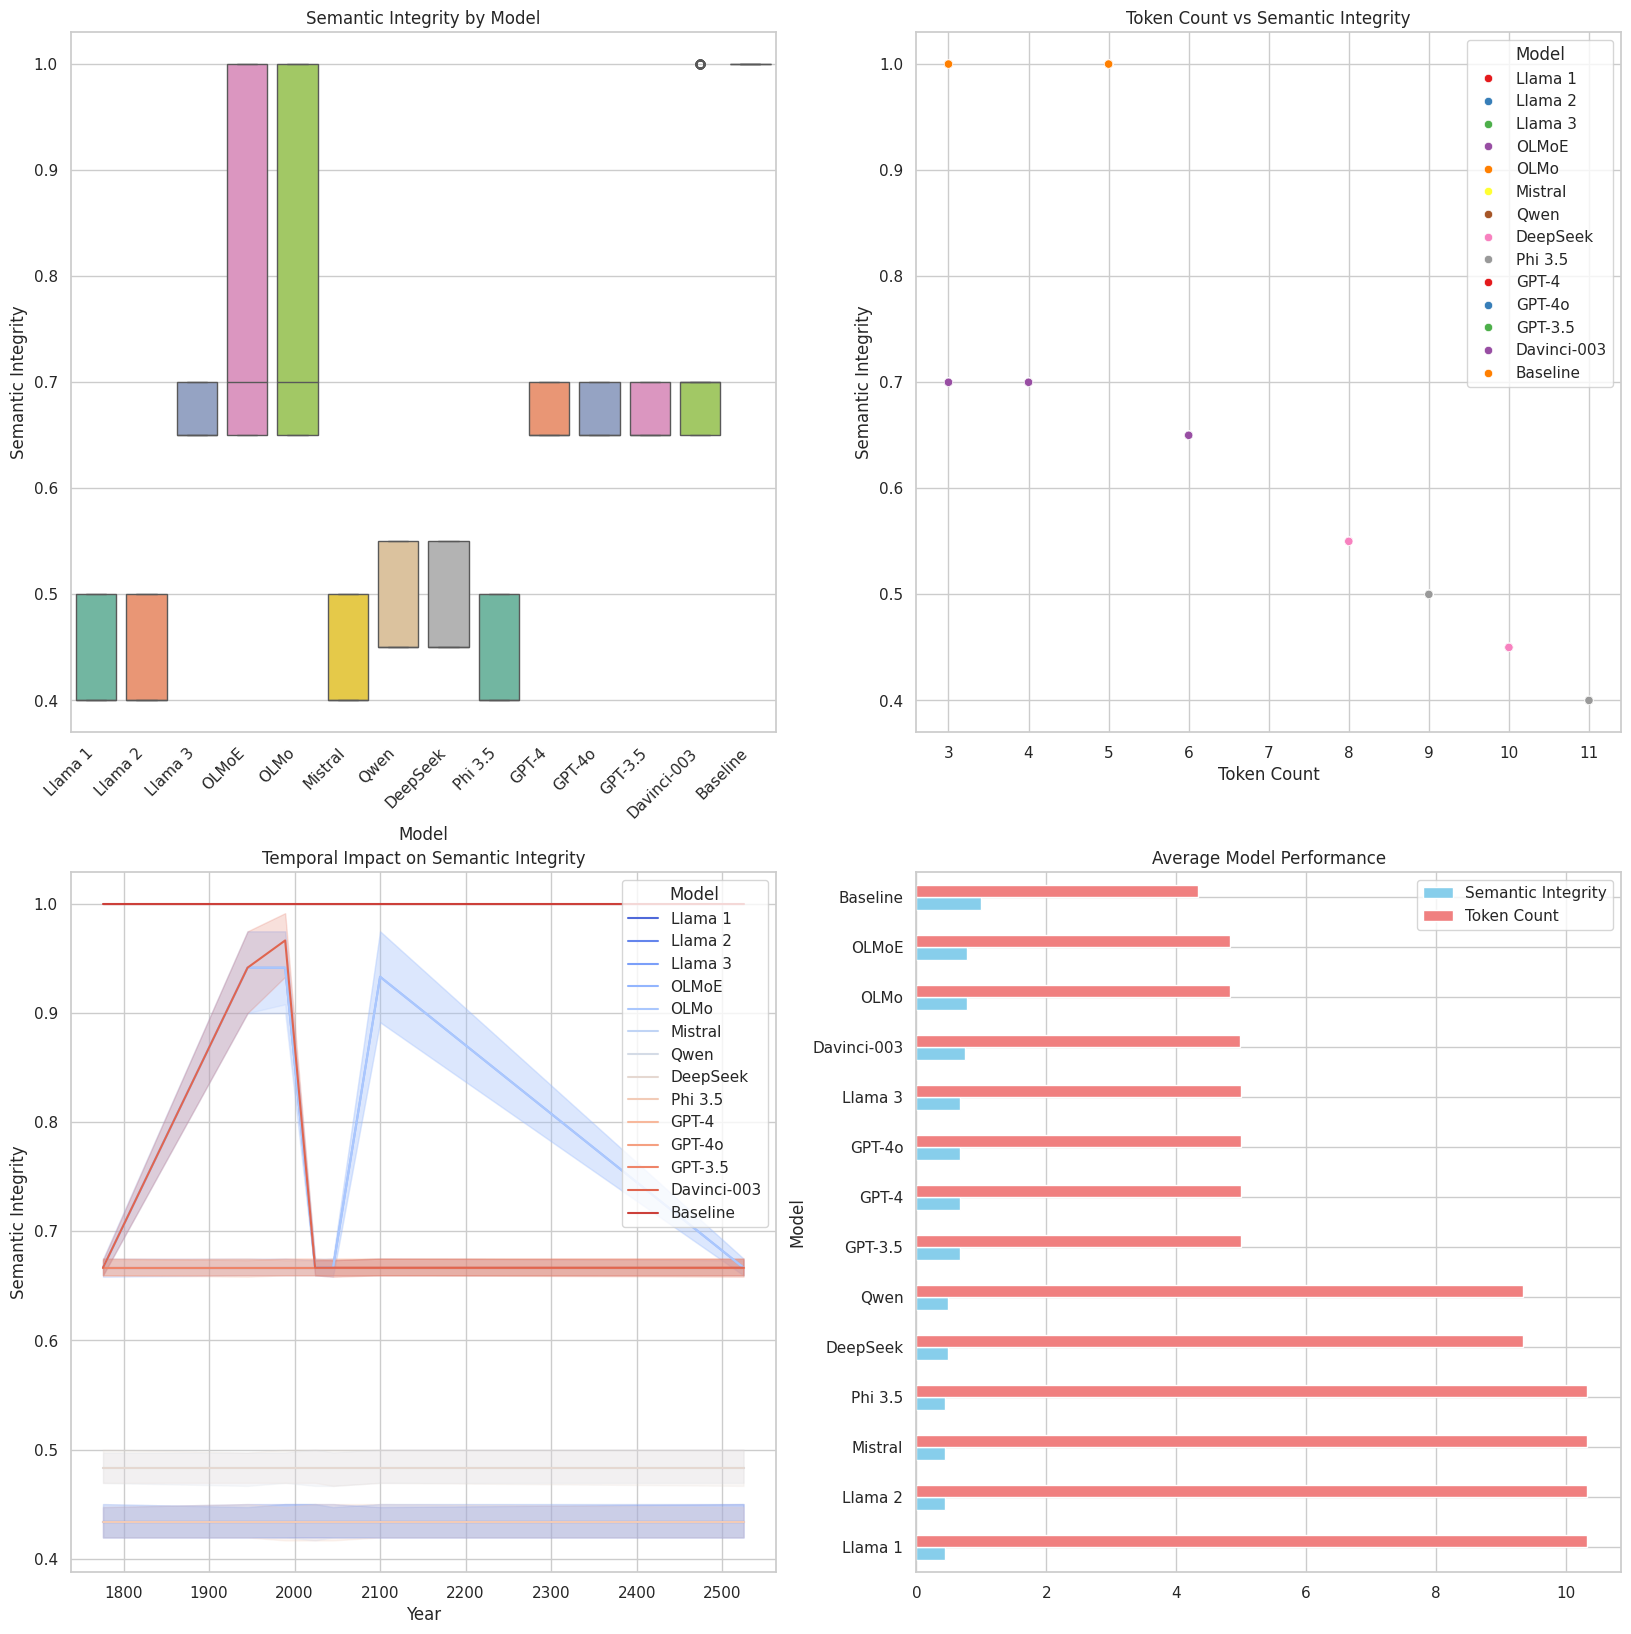

In [ ]:
from transformers import AutoTokenizer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta
import tiktoken
from collections import Counter, defaultdict
import random

# Function to get the appropriate tiktoken encoding based on model name
def get_tiktoken_encoding(model_name):
    encoding_map = {
        "gpt-4": "cl100k_base",
        "gpt-3.5-turbo": "cl100k_base",
        "text-davinci-003": "p50k_base",
        "text-davinci-002": "p50k_base",
        "davinci": "r50k_base",
        "gpt-4o": "o200k_base"
    }
    try:
        return tiktoken.get_encoding(encoding_map.get(model_name, "cl100k_base"))
    except:
        return tiktoken.get_encoding("cl100k_base")

def theta(tokenized_output, baseline):
    t_vals = Counter(tokenized_output)
    b_vals = Counter(baseline)

    # convert to character-vectors
    characters = list(t_vals.keys() | b_vals.keys())
    t_vect = [t_vals.get(char, 0) for char in characters]
    b_vect = [b_vals.get(char, 0) for char in characters]

    # get theta
    len_t  = np.sqrt(sum(tv*tv for tv in t_vect))
    len_b  = np.sqrt(sum(bv*bv for bv in b_vect))
    dot    = sum(tv*bv for tv,bv in zip(t_vect, b_vect))
    theta = dot / (len_t * len_b)
    return theta


# Improved semantic analysis function
def analyze_token_semantics(tokenized_output, format_type, model_name, date_str):
    analysis = {
        'splits_date_components': False,
        'preserves_separators': False,
        'token_count': len(tokenized_output),
        'theta': 1.0,
        'semantic_integrity': 1.0
    }
    correct = baseline_tokenizer(date_str, format_type)
    # correct = " ".join(correct)
    token_str = " ".join(tokenized_output)
    expected_components = {
        'YYYY': r'\b(17|18|19|20|21|22|23|24|25)\d{2}\b',
        'MM': r'\b(0[1-9]|1[0-2])\b',
        'DD': r'\b(0[1-9]|[12][0-9]|3[01])\b'
    }

    splitters = ['-', '/', '.', ' ']
    #compare with correct
    analysis['splits_date_components'] = tokenized_output != correct

    analysis['preserves_separators'] = any(sep in token_str for sep in splitters)

    # Check if separators are preserved
    analysis['preserves_separators'] = any(sep in token_str for sep in ['-', '/', '.', ' '])

    analysis['theta'] = theta(tokenized_output, correct)

    # Adjust semantic integrity based on analysis results
    if analysis['splits_date_components']:
        analysis['semantic_integrity'] -= 0.3

    if not analysis['preserves_separators']:
        analysis['semantic_integrity'] -= 0.2

    # Adjust for excessive token count only if it suggests non-compact representation
    if len(tokenized_output) > 5:
        analysis['semantic_integrity'] -= 0.05 * (len(tokenized_output) - 5)

    # Ensure semantic integrity score stays within valid bounds
    analysis['semantic_integrity'] = max(0.0, min(1.0, analysis['semantic_integrity'])) * analysis['theta']

    return analysis

def baseline_tokenizer(date_str, format_type):
    format_map = {
        'YYYY-MM-DD': r'^(\d{4})(-)(\d{2})(-)(\d{2})$',
        'YYYY/MM/DD': r'^(\d{4})(/)(\d{2})(/)(\d{2})$',
        'YYYY.MM.DD': r'^(\d{4})(\.)(\d{2})(\.)(\d{2})$',
        'DD-MM-YYYY': r'^(\d{2})(-)(\d{2})(-)(\d{4})$',
        'DD/MM/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'MM/DD/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'YYYYMMDD': r'^(\d{4})(\d{2})(\d{2})$',
        'MMDDYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'DDMMYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'Month DD, YYYY': r'^(\w+)( )(\d{1,2})(, )(\d{4})$',
        'DD Month YYYY': r'^(\d{1,2})( )(\w+)( )(\d{4})$',
        'Month DD YYYY': r'^(\w+)( )(\d{1,2})( )(\d{4})$',
    }

    regex = format_map.get(format_type)
    if regex and re.match(regex, date_str):
        match = re.match(regex, date_str)
        if match:
            components = list(match.groups())
            return components
        else:
            print("Error: No match found")
            return [date_str]
    else:
        print("Error: Invalid format or no match")
        return [date_str]


# Function to generate date variations
def generate_date_variations(base_formats):
    date_variations = []
    years = [1776, 1945, 1989, 2024, 2045, 2100, 2525]
    months = sample(list(range(1, 13)), 2)
    days = sample(list(range(1, 29)), 2)

    month_names = {
        1: ('January', 'Jan'),
        2: ('February', 'Feb'),
        3: ('March', 'Mar'),
        4: ('April', 'Apr'),
        5: ('May', 'May'),
        6: ('June', 'Jun'),
        7: ('July', 'Jul'),
        8: ('August', 'Aug'),
        9: ('September', 'Sep'),
        10: ('October', 'Oct'),
        11: ('November', 'Nov'),
        12: ('December', 'Dec')
    }

    for year in years:
        for month in months:
            for day in days:
                for fmt in base_formats:
                    date_str = fmt.replace('YYYY', f'{year:04d}')\
                                  .replace('MM', f'{month:02d}')\
                                  .replace('DD', f'{day:02d}')
                    date_variations.append((date_str, year, fmt))

                # full_month, abbr_month = month_names[month]
                # text_formats = [
                #     f"{full_month} {day}, {year}",
                #     f"{abbr_month} {day}, {year}",
                #     f"{day} {full_month} {year}",
                #     f"{day} {abbr_month} {year}"
                # ]
                # date_variations.extend([(fmt, year, "Text") for fmt in text_formats])
                # date_variations.append((f"{year:04d}{month:02d}{day:02d}", year, "ISO"))

    return date_variations

# Function to tokenize dates and analyze their representation
# Function to tokenize dates and analyze their representation
def tokenize_dates(date_variations, model_name, to_print_name):
    results = []

    if model_name == "baseline":
        # Use baseline tokenizer for perfect tokenization
        tokenize_func = lambda x, fmt: baseline_tokenizer(x, fmt)
    elif model_name in ["gpt-4", "gpt-3.5-turbo", "text-davinci-003", "gpt-4o"]:
        tokenizer = get_tiktoken_encoding(model_name)
        tokenize_func = lambda x: tokenizer.encode(x)
        detokenize_func = lambda x: tokenizer.decode(x)
    else:
        tokenizer = AutoTokenizer.from_pretrained(model_name)
        tokenize_func = lambda x: tokenizer.encode(x, add_special_tokens=False)
        detokenize_func = lambda x: tokenizer.decode(x)

    for date_str, year, fmt in date_variations:
        if model_name == "baseline":
            tokenized_output = tokenize_func(date_str, fmt)
        else:
            tokens = tokenize_func(date_str)
            if isinstance(tokenizer, tiktoken.Encoding):
                tokenized_output = [detokenize_func([t]) for t in tokens]
            else:
                tokenized_output = tokenizer.convert_ids_to_tokens(tokens)

        semantic_analysis = analyze_token_semantics(tokenized_output, fmt, model_name, date_str)

        period = ("Historical (Pre-2000)" if year < 2000
                 else "Contemporary (2000-2024)" if 2000 <= year <= 2024
                 else "Future (Post-2024)")
        century = f"{(year // 100) + 1}th Century"

        results.append({
            'Model': to_print_name,
            'Date Format': date_str,
            'Year': year,
            'Time Period': period,
            'Century': century,
            'Token Count': len(tokenized_output),
            'Tokenized Output': " ".join(tokenized_output),
            'Semantic Integrity': semantic_analysis['semantic_integrity'],
            'Splits Components': semantic_analysis['splits_date_components'],
            'Preserves Separators': semantic_analysis['preserves_separators']
        })

    return pd.DataFrame(results)

# Enhanced function for better visualization
def plot_semantic_analysis(data):
    sns.set(style="whitegrid", context="notebook")
    fig, axes = plt.subplots(2, 2, figsize=(20, 20))
    # fig.suptitle('Date Tokenization Semantic Analysis', fontsize=20, y=1)

    sns.boxplot(data=data, x='Model', y='Semantic Integrity', ax=axes[0, 0], palette='Set2')
    axes[0, 0].set_title('Semantic Integrity by Model')
    axes[0, 0].set_xticklabels(axes[0, 0].get_xticklabels(), rotation=45, ha='right')

    sns.scatterplot(data=data, x='Token Count', y='Semantic Integrity', hue='Model', ax=axes[0, 1], palette='Set1')
    axes[0, 1].set_title('Token Count vs Semantic Integrity')

    sns.lineplot(data=data, x='Year', y='Semantic Integrity', hue='Model', ax=axes[1, 0], palette='coolwarm')
    axes[1, 0].set_title('Temporal Impact on Semantic Integrity')

    model_perf = data.groupby('Model')[['Semantic Integrity', 'Token Count']].mean().sort_values(by='Semantic Integrity')
    model_perf.plot(kind='barh', ax=axes[1, 1], color=['skyblue', 'lightcoral'])
    axes[1, 1].set_title('Average Model Performance')


def main():
    base_formats = [
        'YYYY-MM-DD',
        'YYYY/MM/DD',
        'YYYY.MM.DD',
        'DD-MM-YYYY',
        'DD/MM/YYYY',
        'MM/DD/YYYY',
        'YYYYMMDD',
        'MMDDYYYY',
        'DDMMYYYY'
    ]

    model_list = {
        'relaxml/Llama-1-7b-hf': 'Llama 1',
        'meta-llama/Llama-2-7b-hf': 'Llama 2',
        'meta-llama/Llama-3.2-1B-Instruct' : "Llama 3",
        'allenai/OLMoE-1B-7B-0924-Instruct': 'OLMoE',
        'allenai/OLMo-1B-0724-hf': 'OLMo',
        'mistralai/Mistral-7B-Instruct-v0.3': 'Mistral',
        'Qwen/Qwen2.5-7B-Instruct': 'Qwen',
        'deepseek-ai/DeepSeek-V2.5': 'DeepSeek',
        'microsoft/Phi-3.5-mini-instruct':'Phi 3.5',
        'gpt-4': 'GPT-4',
        'gpt-4o': 'GPT-4o',
        'gpt-3.5-turbo': 'GPT-3.5',
        'text-davinci-003': 'Davinci-003',
        'baseline': 'Baseline'
    }

    date_variations = generate_date_variations(base_formats)
    all_data = []

    for model_name, print_name in model_list.items():
        print(f"Processing {print_name}...")
        df = tokenize_dates(date_variations, model_name=model_name, to_print_name=print_name)
        all_data.append(df)

    combined_data = pd.concat(all_data, ignore_index=True)

    # Generate visualizations and analysis
    fig = plot_semantic_analysis(combined_data)

    # Save results
    combined_data.to_csv('date_tokenization_semantic_analysis.csv', index=False)

    # Print summary statistics
    summary = combined_data.groupby('Model').agg({
        'Semantic Integrity': 'mean',
        'Token Count': 'mean',
        'Splits Components': 'mean',
        'Preserves Separators': 'mean'
    }).round(3)

    summary = summary.sort_values('Semantic Integrity', ascending=False)

    print("\nModel Performance Summary:")
    print(summary)

    return summary, combined_data


summary, combined_data = main()

In [ ]:
summary

,Semantic Integrity,Token Count,Splits Components,Preserves Separators
Model,,,,
Baseline,1.000,4.333,0.000,1.0
OLMo,0.769,4.746,0.706,1.0
OLMoE,0.769,4.746,0.706,1.0
Davinci-003,0.736,4.913,0.802,1.0
GPT-3.5,0.667,5.000,1.000,1.0
GPT-4,0.667,5.000,1.000,1.0
GPT-4o,0.667,5.000,1.000,1.0
Llama 3,0.667,5.000,1.000,1.0
DeepSeek,0.483,9.333,1.000,1.0


In [ ]:
new_df = combined_data.groupby('Model').sample(n=1, random_state=42)
new_df

,Model,Date Format,Year,Time Period,Century,Token Count,Tokenized Output,Semantic Integrity,Splits Components,Preserves Separators
3441,Baseline,05-08-2045,2045,Future (Post-2024),21th Century,5,05 - 08 - 2045,1.00,False,True
3121,Davinci-003,08051989,1989,Historical (Pre-2000),20th Century,3,0 805 1989,0.70,True,True
1884,DeepSeek,10-03-2024,2024,Contemporary (2000-2024),21th Century,10,1 0 - 0 3 - 2 0 2 4,0.45,True,True
2905,GPT-3.5,08052024,2024,Contemporary (2000-2024),21th Century,3,080 520 24,0.70,True,True
2380,GPT-4,05/03/2024,2024,Contemporary (2000-2024),21th Century,6,05 / 03 / 202 4,0.65,True,True
2669,GPT-4o,03/05/2045,2045,Future (Post-2024),21th Century,6,03 / 05 / 204 5,0.65,True,True
156,Llama 1,10-03-2045,2045,Future (Post-2024),21th Century,11,▁ 1 0 - 0 3 - 2 0 4 5,0.40,True,True
402,Llama 2,20450305,2045,Future (Post-2024),21th Century,9,▁ 2 0 4 5 0 3 0 5,0.50,True,True
543,Llama 3,05-03-1945,1945,Historical (Pre-2000),20th Century,6,05 - 03 - 194 5,0.65,True,True
1490,Mistral,03/10/2525,2525,Future (Post-2024),26th Century,11,▁ 0 3 / 1 0 / 2 5 2 5,0.40,True,True


In [ ]:
#find the rows that have models as baseline and semaitic ingegeyt as 0.7
combined_data[(combined_data['Model'] != 'Baseline') & (combined_data['Semantic Integrity'] == 1 )]

,Model,Date Format,Year,Time Period,Century,Token Count,Tokenized Output,Semantic Integrity,Splits Components,Preserves Separators
792,OLMoE,1945-12-12,1945,Historical (Pre-2000),20th Century,5,1945 - 12 - 12,1.0,False,True
793,OLMoE,1945/12/12,1945,Historical (Pre-2000),20th Century,5,1945 / 12 / 12,1.0,False,True
794,OLMoE,1945.12.12,1945,Historical (Pre-2000),20th Century,5,1945 . 12 . 12,1.0,False,True
795,OLMoE,12-12-1945,1945,Historical (Pre-2000),20th Century,5,12 - 12 - 1945,1.0,False,True
796,OLMoE,12/12/1945,1945,Historical (Pre-2000),20th Century,5,12 / 12 / 1945,1.0,False,True
...,...,...,...,...,...,...,...,...,...,...
3126,Davinci-003,25-08-1989,1989,Historical (Pre-2000),20th Century,5,25 - 08 - 1989,1.0,False,True
3127,Davinci-003,25/08/1989,1989,Historical (Pre-2000),20th Century,5,25 / 08 / 1989,1.0,False,True
3128,Davinci-003,08/25/1989,1989,Historical (Pre-2000),20th Century,5,08 / 25 / 1989,1.0,False,True
3129,Davinci-003,19890825,1989,Historical (Pre-2000),20th Century,3,1989 08 25,1.0,False,True


In [ ]:
def baseline_tokenizer(date_str, format_type):
    components = {
        'YYYY': r'(\d{4})',
        'MM': r'(0[1-9]|1[0-2])',
        'DD': r'(0[1-9]|[12][0-9]|3[01])'
    }

    format_map = {
        'YYYY-MM-DD': r'^(\d{4})-(\d{2})-(\d{2})$',
        'YYYY/MM/DD': r'^(\d{4})/(\d{2})/(\d{2})$',
        'YYYY.MM.DD': r'^(\d{4})\.(\d{2})\.(\d{2})$',
        'DD-MM-YYYY': r'^(\d{2})-(\d{2})-(\d{4})$',
        'DD/MM/YYYY': r'^(\d{2})/(\d{2})/(\d{4})$',
        'MM/DD/YYYY': r'^(\d{2})/(\d{2})/(\d{4})$',
        'YYYYMMDD': r'^(\d{4})(\d{2})(\d{2})$',
        'MMDDYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'DDMMYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'Month DD, YYYY': r'^(\w+) (\d{1,2}), (\d{4})$',
        'DD Month YYYY': r'^(\d{1,2}) (\w+) (\d{4})$',
        'Month DD YYYY': r'^(\w+) (\d{1,2}) (\d{4})$',
    }

    month_map = {
        'January': '01', 'Jan': '01', 'February': '02', 'Feb': '02', 'March': '03', 'Mar': '03',
        'April': '04', 'Apr': '04', 'May': '05', 'June': '06', 'Jun': '06', 'July': '07', 'Jul': '07',
        'August': '08', 'Aug': '08', 'September': '09', 'Sep': '09', 'October': '10', 'Oct': '10',
        'November': '11', 'Nov': '11', 'December': '12', 'Dec': '12'
    }

    regex = format_map.get(format_type)
    if regex:
        match = re.match(regex, date_str)
        if match:
            components = list(match.groups())
            # Replace month name with numerical value if needed
            # if format_type in ['Month DD, YYYY', 'DD Month YYYY']:
            #     if components[0] in month_map:
            #         components[0] = month_map[components[0]]
            #     elif components[1] in month_map:
            #         components[1] = month_map[components[1]]
            return components
        else:
            # Attempt to split the string without separators
            if format_type in ['YYYYMMDD', 'MMDDYYYY', 'DDMMYYYY']:
                year, month, day = date_str[:4], date_str[4:6], date_str[6:]
                return [year, month, day]
            return [date_str]
    else:
        return [date_str]


baseline_tokenizer('19 Sep 2525', 'DD Month YYYY')

['19', 'Sep', '2525']

In [ ]:
import re

def baseline_tokenizer(date_str, format_type):
    format_map = {
        'YYYY-MM-DD': r'^(\d{4})(-)(\d{2})(-)(\d{2})$',
        'YYYY/MM/DD': r'^(\d{4})(/)(\d{2})(/)(\d{2})$',
        'YYYY.MM.DD': r'^(\d{4})(\.)(\d{2})(\.)(\d{2})$',
        'DD-MM-YYYY': r'^(\d{2})(-)(\d{2})(-)(\d{4})$',
        'DD/MM/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'MM/DD/YYYY': r'^(\d{2})(/)(\d{2})(/)(\d{4})$',
        'YYYYMMDD': r'^(\d{4})(\d{2})(\d{2})$',
        'MMDDYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'DDMMYYYY': r'^(\d{2})(\d{2})(\d{4})$',
        'Month DD, YYYY': r'^(\w+)( )(\d{1,2})(, )(\d{4})$',
        'DD Month YYYY': r'^(\d{1,2})( )(\w+)( )(\d{4})$',
        'Month DD YYYY': r'^(\w+)( )(\d{1,2})( )(\d{4})$',
    }

    regex = format_map.get(format_type)
    if regex and re.match(regex, date_str):
        match = re.match(regex, date_str)
        if match:
            components = list(match.groups())
            return components
        else:
            print("Error: No match found")
            return [date_str]
    else:
        print("Error: Invalid format or no match")
        return [date_str]

# Example usage:
print(baseline_tokenizer("2024-11-11", "YYYY-MM-DD"))  # ['2024', '-', '11', '-', '11']
print(baseline_tokenizer("11/11/2024", "MM/DD/YYYY"))

['2024', '-', '11', '-', '11']
['11', '/', '11', '/', '2024']


Semantic Intergrity of Dates is defined as:
$$ \text{semantic integrity} = \max \left( 0, \min \left( 1, 1 - P - S - T \right) \right) \times \text{R}$$

where:

- $ P = 0.3 $ if there is unnessary splitting of dates.
- $ S = 0.2 $ if separators are not preserved.
- $ T = 0.05 \times (\text{token\_count} - 5) $ if `token_count` > 5.
- $ \text{R} = \cos(\Theta) = \frac{\text{Tokenized Output} \cdot \text{Baseline}}{\|\text{Tokenized Output}\|\times\|\text{Baseline}\|}$

This version focuses on readability, defining how each component \( P \), \( S \), \( T \), and \( R \) contributes to the final score.